In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_excel("D:/github/Etape/toutReponse.xlsx")

In [18]:
df = df.drop("id", axis =1)

In [19]:
df.head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,Bilan de competences,Avranches,2021-02-03,2021-06-04,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,Bilan de competences,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,Bilan de competences,Vire,2021-02-23,2021-06-08,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,Bilan de competences,Vire,2021-02-23,2021-06-08,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,Bilan de competences,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [20]:
df.dispositif.value_counts()

Bilan de competences                         60
Primo insertion sociale                      37
Prestations specifiques                      28
Primo insertion professionnelle              28
Remobilisation                               13
Garantie Departementale d'Activite (GAD)     12
La dynimique de l'emploi                     11
Formation des acteurs                        10
Actions courtes type 'marchons pour ... '     3
Interventions scolaires et universitaires     2
Présentation du Harcelement                   2
Name: dispositif, dtype: int64

### remplacement de La dynimique de l'emploi en Prestations specifiques

In [22]:
df.dispositif.replace("La dynimique de l'emploi", "Prestations specifiques", inplace = True)
df.dispositif.value_counts()

Bilan de competences                         60
Prestations specifiques                      39
Primo insertion sociale                      37
Primo insertion professionnelle              28
Remobilisation                               13
Garantie Departementale d'Activite (GAD)     12
Formation des acteurs                        10
Actions courtes type 'marchons pour ... '     3
Interventions scolaires et universitaires     2
Présentation du Harcelement                   2
Name: dispositif, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dispositif     206 non-null    object
 1   site           199 non-null    object
 2   debut          206 non-null    object
 3   fin            207 non-null    object
 4   statue         209 non-null    object
 5   branche        209 non-null    object
 6   fin1           8 non-null      object
 7   fin2           8 non-null      object
 8   fin3           8 non-null      object
 9   fin4           9 non-null      object
 10  fin5           9 non-null      object
 11  intType        53 non-null     object
 12  inter1         54 non-null     object
 13  inter2         52 non-null     object
 14  inter3         53 non-null     object
 15  inter4         51 non-null     object
 16  intForDis      53 non-null     object
 17  inter5         18 non-null     object
 18  intRisqS       53 non-null    

### Raccourcissement du nom de disposition.

In [24]:
map_dict = {"Remobilisation" : "Remob", "Garantie Departementale d'Activite (GAD)" : "GDA", 
            "Primo insertion sociale":"PIS", "Primo insertion professionnelle":"PIP", 
            "Actions courtes type 'marchons pour ... '":"AC", "Formation civique OFII":"FCO", 
            "Jardins partages": "JP", "#avenir":"#avenir", "Accompagnement a la preparation de la VAE":"APV", 
            "Bilan de competences":"BC","Reseau de soutien et de recherche d'emploi":"RSRE", 
            "Prestations specifiques":"PS", "Accompagnement des porteurs de projets":"APP", 
            "Formation des acteurs":"FA", "Interventions dans les centres de formation":"ICF", 
            "Interventions scolaires et universitaires":"ISU", "La dynimique de l'emploi":"DE", 
            "Présentation du Harcelement":"PH"}
df.dispositif = df.dispositif.map(map_dict)

## Gérer les valeurs manquantes et mauvais

In [25]:
df.isnull().sum()[0:6]
# pd.isnull(df).sum()
# df.dropna(inplace=True)
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
#df.isnull().sum().sum()

dispositif     3
site          10
debut          3
fin            2
statue         0
branche        0
dtype: int64

### Dispositif

In [26]:
df[df.dispositif.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
18,NaN,Vire,2021-01-11,2021-04-23,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:46:10
30,NaN,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54


In [27]:
df.at[7, "dispositif"] = "BC" #df[(df.debut == "2021-02-11") | (df.fin == "2021-05-03")], il ya 4 et tous sont BC.
df.at[18, "dispositif"] ="BC" #df[(df.debut == "2021-01-11") | (df.fin == "2021-04-23")], il ya 4 et tous sont BC.
df.at[30, "dispositif"] ="BC" #df[(df.debut == "2020-12-02") | (df.fin == "2021-03-24")], İL ya 3 et 2 autre sont BC

In [28]:
df.dispositif.isnull().sum()

0

### Site

In [29]:
df[df.site.isnull()==True].head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
25,BC,NaN,2021-03-04,2021-06-11,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:56:46
26,BC,NaN,2021-03-04,2021-06-11,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:57:32
30,BC,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54
51,BC,NaN,2020-09-01,2020-11-28,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,NaN,"Peut-être un peu plus de temps, plus de rendez...",2021-06-22 14:27:42
107,ISU,NaN,2020-12-01,2020-12-01,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bonne intention intervenants/ élèves. Théme in...,fait un contexte particulier,2021-06-30 10:31:12


In [30]:
df.at[30, "site"] ="Saint-Lo" # df[(df.debut == "2020-12-02") | (df.fin == "2021-03-24")], İL ya 3 et 2 autre sont st.lo
df.at[25, "site"] ="Vire" #df[(df.debut == "2021-03-04") | (df.fin == "2021-06-11")]
df.at[26, "site"] ="Vire" #df[(df.debut == "2021-03-04") | (df.fin == "2021-06-11")]
df.at[51, "site"] ="Vire"  #df[(df.debut == "2020-09-01") | (df.fin == "2020-11-28")] meme dates avec ça
df.at[107, "site"] = "Autre Lieu Delocalise" # meme dates il ya 2 differant dispositif, je designe comme ca. 
df.at[108, "site"] = "Autre Lieu Delocalise" # meme dates il ya 2 differant dispositif, je designe comme ca. 
df.at[111, "site"] = "Autre Lieu Delocalise" #df[(df.debut == "2021-04-06") | (df.fin == "2021-06-25")], il ya 8 data meme
df.at[119, "site"] = "La Ferte-Mace" #df[df.dispositif =="Actions courtes type 'marchons pour ... '"] il ya 2 dispositif action courtes je donne autre lieu
df.at[125, "site"] = "Bayeux"  #df[(df.debut == "2021-05-17") | (df.fin == "2021-07-16")] il ya 8 data meme dates avec bayeux
df.at[158, "site"] = "Avranches" #df[(df.debut == "2021-02-16") | (df.fin == "2021-09-02")]  il ya 12 data meme dates avec avranches

In [31]:
df.site.isnull().sum()

0

### Debut

In [32]:
df.debut.value_counts(ascending=False, sort=True) # il ya une mal valeur 212020-01-08. 

2021-05-03      14
2020-06-01      14
2020-06-08      12
2021-02-16      12
2021-06-14      10
2021-04-01      10
2020-11-30       9
2021-05-17       8
2020-06-03       6
2021-05-05       6
2021-10-28       5
2021-06-30       5
2021-01-20       4
2021-02-03       4
2021-08-30       4
2021-04-15       4
2021-01-11       4
2020-12-04       3
2021-05-11       3
2021-10-20       3
2021-02-02       3
2020-12-03       3
2020-12-02       3
2021-02-23       3
2021-03-04       3
2021-03-30       2
2020-09-03       2
2021-12-08       2
2020-05-12       2
2020-09-17       2
2020-12-01       2
2021-09-01       2
2020-09-01       2
2021-12-22       2
2021-01-08       2
2021-03-26       2
2021-06-11       2
2020-10-12       2
2020-10-02       2
2020-01-09       2
2021-03-12       2
2020-11-11       1
2021-11-28       1
2020-07-30       1
2019-11-15       1
2020-08-11       1
2021-02-11       1
2020-08-13       1
2020-05-18       1
2021-06-21       1
2021-04-06       1
2021-06-29       1
2021-02-20  

In [33]:
df.debut.replace(to_replace = "212020-01-08", value = "2021-01-08", inplace=True) 
df.debut.replace(to_replace = "2021-10-20", value = "2021-01-20", inplace=True)

In [34]:
df[df.debut.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
48,BC,Vire,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,2021-06-22 14:12:17
54,BC,Saint-Lo,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,NaN,2021-06-23 09:16:58
104,PIP,Argentan,NaN,2021-06-15,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,NaN,2021-06-25 09:05:06


In [35]:
df.at[48, "debut"] = "2020-01-09" 
df.at[104, "debut"] = "2021-01-20"
df.at[54, "debut"] = "2020-09-17"

In [36]:
df.debut.isnull().sum()

0

### Fin

In [37]:
df.fin.value_counts(dropna=False).head()

2021-10-18    14
2020-11-02    13
2020-11-17    12
2021-09-02    12
2021-06-15     9
Name: fin, dtype: int64

In [38]:
df.fin.replace(to_replace = "0021-05-03", value = "2021-05-03", inplace=True)

In [39]:
df.at[48, "fin"] = "2020-06-15"
df.at[54, "fin"] = "2021-02-01"
df.at[93, "fin"] = "2021-05-10" # debut est 2020-11-30, cest pas possible fin au 2020-05-10
df.at[97, "fin"] = "2021-03-01" # debut est 2020-08-01, cest pas possible fin au 2020-03-01

In [40]:
df[93:94]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
93,PIS,La Ferte-Mace,2020-11-30,2021-05-10,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thème de prestation a été réalisée à la demand...,NaN,2021-06-23 13:10:30


In [41]:
df.fin.isnull().sum()

0

## Création de nouvelles colonnes

### Combien de jours l'action s'est-elle poursuivie ?

In [42]:
df.debut = pd.to_datetime(df.debut, format = "%Y-%m-%d")
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [43]:
df["jour"] = df.fin-df.debut

In [44]:
df.columns

Index(['dispositif', 'site', 'debut', 'fin', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date', 'jour'],
      dtype='object')

In [45]:
df.loc[1:5, "jour"]

1   105 days
2   105 days
3   105 days
4   115 days
5   115 days
Name: jour, dtype: timedelta64[ns]

In [46]:
df["jourChiffres"]=pd.to_timedelta(df.jour, errors="coerce").dt.days

In [47]:
df.loc[1:5, "jourChiffres"]

1    105
2    105
3    105
4    115
5    115
Name: jourChiffres, dtype: int64

### En quelle année, mois et jour l'action s'est-elle faite?

In [48]:
df["annéeDebut"] = df["debut"].dt.year
df["moisDebut"] = df["debut"].dt.month
df["jourDebut"] = df["debut"].dt.day
df["annéeFin"] = df["fin"].dt.year
df["moisFin"] = df["fin"].dt.month
df["jourFin"] = df["fin"].dt.day

In [49]:
df.loc[1:5,"annéeDebut":"jourFin" ]

,annéeDebut,moisDebut,jourDebut,annéeFin,moisFin,jourFin
1,2021,2,23,2021,6,8
2,2021,2,23,2021,6,8
3,2021,2,23,2021,6,8
4,2021,1,8,2021,5,3
5,2021,1,8,2021,5,3


### Création d'une nouvelle colonne appelée "période".

In [50]:
df["périodeDebut"] = df["moisDebut"] >= 7
df["périodeDebut"] = df["périodeDebut"] + 1
df["périodeFin"] = df["moisFin"] >= 7
df["périodeFin"] = df["périodeFin"] + 1

In [51]:
df.loc[1:5,"périodeDebut":"périodeFin"]

,périodeDebut,périodeFin
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1


### Création d'une nouvelle colonne appelée période annuelle.

In [52]:
df["périodeAnnuelleDebut"] = df["annéeDebut"].astype(str) + "-" + df["périodeDebut"].astype(str)

In [53]:
df["périodeAnnuelleFin"] = df["annéeFin"].astype(str) + "-" + df["périodeFin"].astype(str)

In [54]:
df.loc[1:5,"périodeAnnuelleDebut":"périodeAnnuelleFin"]

,périodeAnnuelleDebut,périodeAnnuelleFin
1,2021-1,2021-1
2,2021-1,2021-1
3,2021-1,2021-1
4,2021-1,2021-1
5,2021-1,2021-1


## Nouvelle table 

In [55]:
df.columns

Index(['dispositif', 'site', 'debut', 'fin', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date', 'jour', 'jourChiffres',
       'annéeDebut', 'moisDebut', 'jourDebut', 'annéeFin', 'moisFin',
       'jourFin', 'périodeDebut', 'périodeFin', 'périodeAnnuelleDebut',
       'périodeAnnuelleFin'],
      dtype='object')

In [56]:
df = df[['dispositif', 'site', 
    'debut', 'annéeDebut','moisDebut', 'jourDebut','périodeDebut', 'périodeAnnuelleDebut',
    'fin', 'annéeFin', 'moisFin', 'jourFin','périodeFin', 'périodeAnnuelleFin', 
    'jour', 'jourChiffres', 'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 
    'intType', 'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5', 
    'intRisqS', 'intRisqH', 'intRisqJ','intRisqEn', 'intRisqEc', 'preUsager', 
    'pre1', 'pre2', 'pre3', 'pre4','pre5', 'pre6', 
    'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date']]

In [57]:
df.loc[1, :]

dispositif                                                             BC
site                                                                 Vire
debut                                                 2021-02-23 00:00:00
annéeDebut                                                           2021
moisDebut                                                               2
jourDebut                                                              23
périodeDebut                                                            1
périodeAnnuelleDebut                                               2021-1
fin                                                   2021-06-08 00:00:00
annéeFin                                                             2021
moisFin                                                                 6
jourFin                                                                 8
périodeFin                                                              1
périodeAnnuelleFin                    

## Analyse de questionnaire

### Combien d'enquêtes avons-nous ?

In [58]:
df.index

RangeIndex(start=0, stop=209, step=1)

In [59]:
len(df)

209

In [60]:
print("Il y a", len(df.index), "enquêtes dans la base de données.")
print("Ces enquêtes sont réalisées entre", str(df.fin.min())[0:10], "et", str(df.fin.max())[0:10])

Il y a 209 enquêtes dans la base de données.
Ces enquêtes sont réalisées entre 2020-06-15 et 2021-11-04


### Nom et Nombre total de dispositif sont:

In [61]:
print("Nom de dispositif sont:", df.dispositif.unique())
print("Nombre de dispositif sont: ", df.dispositif.nunique())

Nom de dispositif sont: ['BC' 'PIS' 'Remob' 'PIP' 'GDA' 'ISU' 'PH' 'PS' 'AC' 'FA']
Nombre de dispositif sont:  10


### Dispersion du type de dispositif parmi tout questionnaires

BC       63
PS       39
PIS      37
PIP      28
Remob    13
GDA      12
FA       10
AC        3
PH        2
ISU       2
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'dispersion du type de dispositif')

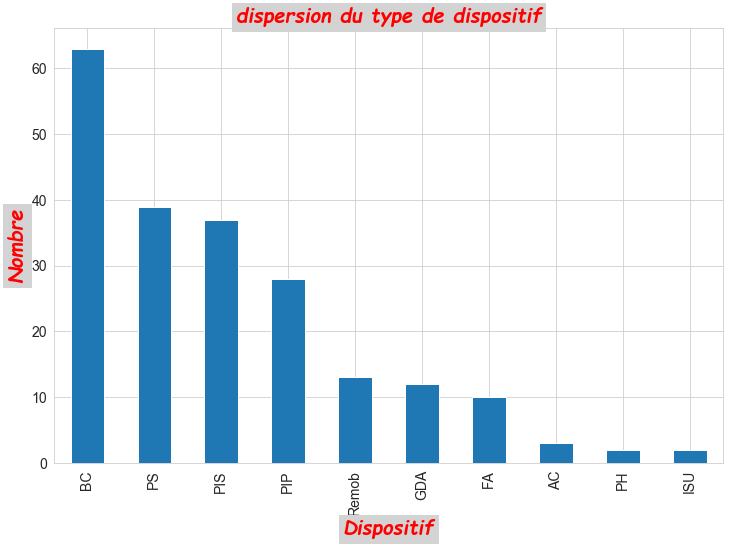

In [62]:
print(df.dispositif.value_counts(dropna=True))
fontdict = {"size":20, "color":"red", "alpha":1, "backgroundcolor":"lightgray", "style": "italic", "weight":"black", "family": "fantasy"}
dispTotal = df.dispositif.value_counts().plot(kind="bar", figsize=(12,8), fontsize =14)
dispTotal.set_xlabel("Dispositif", fontdict = fontdict)
dispTotal.set_ylabel("Nombre", fontdict= fontdict)
dispTotal.set_title(label = "dispersion du type de dispositif", fontdict= fontdict)

### Taux de pourcentage de du type de dispositif sont:

BC       0.30
PS       0.19
PIS      0.18
PIP      0.13
Remob    0.06
GDA      0.06
FA       0.05
AC       0.01
PH       0.01
ISU      0.01
Name: dispositif, dtype: float64


Text(0.5, 1.0, 'Taux de pourcentage de dispositif')

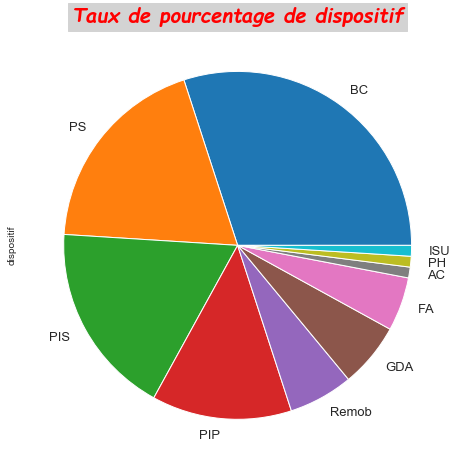

In [63]:
print(round((df.dispositif.value_counts(normalize=True)), 2))
dispTaux = round(df.dispositif.value_counts(normalize=True), 2).plot(kind="pie", figsize = (12,8), fontsize=13)
dispTaux.set_title("Taux de pourcentage de dispositif", fontdict=fontdict)

## Analyse de site

### Nom et Nombre total de site sont:

In [64]:
print("Nom de sites sont:", df.site.unique())
print("Nombre de site est: ", df.site.nunique())

Nom de sites sont: ['Avranches' 'Vire' 'Argentan' 'Saint-Lo' 'La Ferte-Mace' 'Flers'
 'Domfront' 'Autre Lieu Delocalise' 'Bayeux' 'Falaise' 'Caen']
Nombre de site est:  11


### Dispersion de site:

Vire                     68
Argentan                 39
Autre Lieu Delocalise    26
Avranches                14
Domfront                 13
La Ferte-Mace            12
Saint-Lo                 12
Bayeux                    9
Flers                     8
Falaise                   6
Caen                      2
Name: site, dtype: int64


Text(0.5, 1.0, 'Nombres total de site')

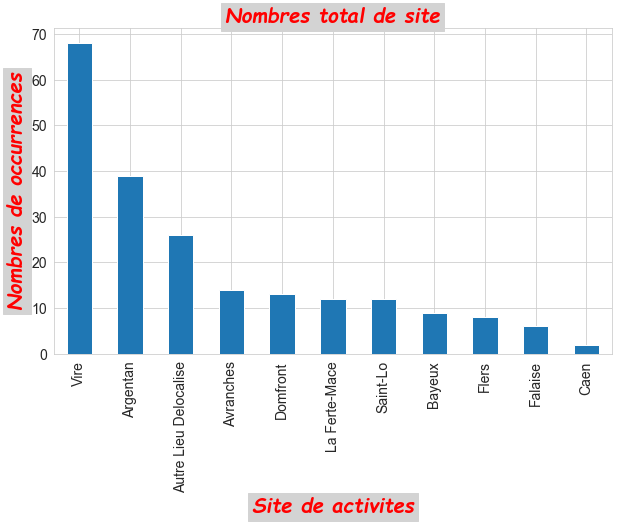

In [65]:
print(df.site.value_counts())
siteTotal = df.site.value_counts().plot(kind = "bar", title = "Nombre total de site", figsize=(10,6), fontsize=14)
siteTotal.set_xlabel("Site de activites", fontdict=fontdict)
siteTotal.set_ylabel("Nombres de occurrences", fontdict=fontdict)
siteTotal.set_title("Nombres total de site", fontdict=fontdict)

### Taux de pourcentage de site sont:

Vire                     0.33
Argentan                 0.19
Autre Lieu Delocalise    0.12
Avranches                0.07
Domfront                 0.06
La Ferte-Mace            0.06
Saint-Lo                 0.06
Bayeux                   0.04
Flers                    0.04
Falaise                  0.03
Caen                     0.01
Name: site, dtype: float64


Text(0.5, 1.0, 'Taux de pourcentage de site')

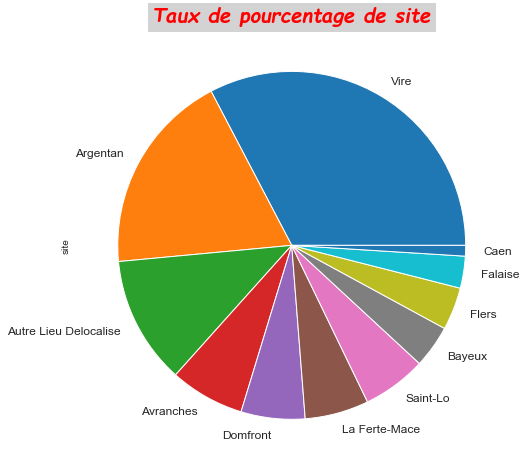

In [66]:
print(round((df.site.value_counts(normalize=True)), 2))
siteTaux = round(df.site.value_counts(normalize=True), 2).plot(kind="pie", figsize = (12,8), fontsize=12)
siteTaux.set_title("Taux de pourcentage de site", fontdict=fontdict)

## Analyse de debut

### Nombre de demandes d'enquête par année par rapport de debut de disposition

Nombre de demandes d'enquête par année : 
 2021    130
2020     78
2019      1
Name: annéeDebut, dtype: int64


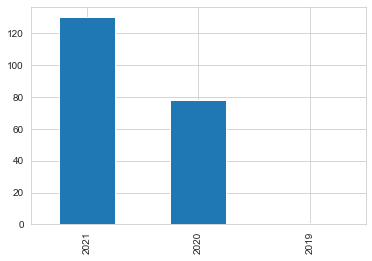

In [67]:
print("Nombre de demandes d'enquête par année :","\n", df.annéeDebut.value_counts())
df.annéeDebut.value_counts().plot(kind="bar")

### Nombre de demandes d'enquête par mois par rapport de debut de disposition

Text(0.5, 1.0, 'Les debuts de disposition par rapport de mois')

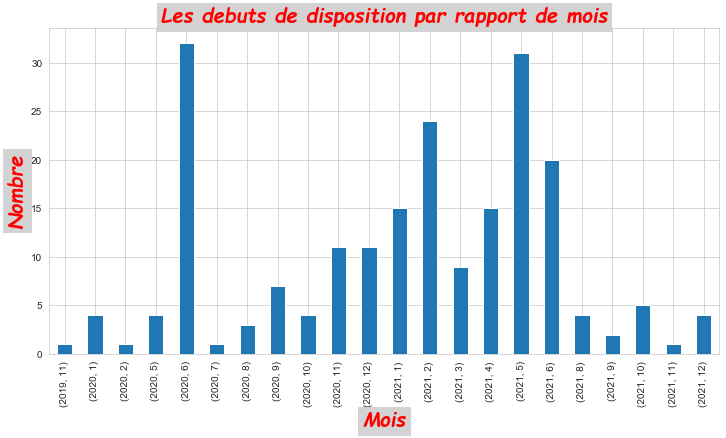

In [68]:
debutMois = df.groupby("annéeDebut")["moisDebut"].value_counts(ascending=False, sort=False).plot(kind="bar", figsize=(12,6))
debutMois.set_xlabel("Mois", fontdict=fontdict)
debutMois.set_ylabel("Nombre", fontdict=fontdict)
debutMois.set_title("Les debuts de disposition par rapport de mois", fontdict=fontdict)

### Periode des debuts

Répartition des périodes selon les dates de début est : périodeAnnuelleDebut
2019-2      1
2020-1     41
2020-2     37
2021-1    114
2021-2     16
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'Répartition des périodes selon les dates de début')

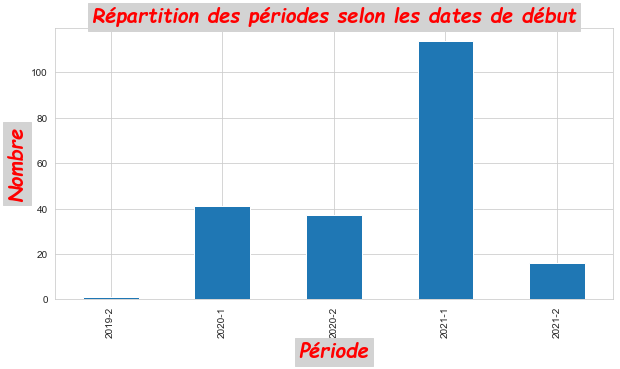

In [69]:
print("Répartition des périodes selon les dates de début est :", df.groupby("périodeAnnuelleDebut")["dispositif"].count())
périodeDebut = df.groupby("périodeAnnuelleDebut")["dispositif"].count().plot(kind="bar", figsize=(10,5))
périodeDebut.set_xlabel("Période", fontdict=fontdict)
périodeDebut.set_ylabel("Nombre", fontdict=fontdict)
périodeDebut.set_title("Répartition des périodes selon les dates de début", fontdict=fontdict)

## Analyse de fin

### Nombre de demandes d'enquête par année par rapport de fin de disposition

Nombre de demandes d'enquête par année : 
 2021    159
2020     50
Name: annéeFin, dtype: int64


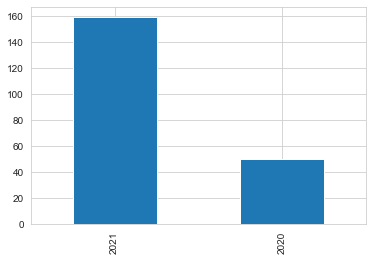

In [70]:
print("Nombre de demandes d'enquête par année :","\n", df.annéeFin.value_counts())
df.annéeFin.value_counts().plot(kind="bar")

### Nombre de demandes d'enquête par mois par rapport de fin de disposition

Text(0.5, 1.0, 'Les fins de disposition par rapport de mois')

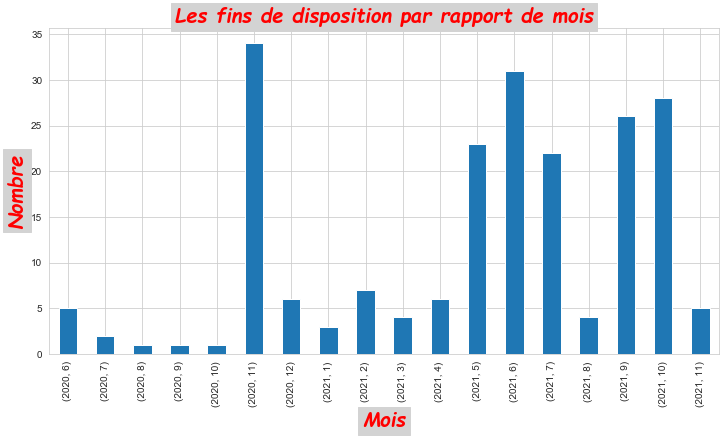

In [71]:
finMois = df.groupby("annéeFin")["moisFin"].value_counts(ascending=False, sort=False).plot(kind="bar", figsize=(12,6))
finMois.set_xlabel("Mois", fontdict=fontdict)
finMois.set_ylabel("Nombre", fontdict=fontdict)
finMois.set_title("Les fins de disposition par rapport de mois", fontdict=fontdict)

### Periode des fins

Répartition des périodes selon les dates de fin est : périodeAnnuelleFin
2020-1     5
2020-2    45
2021-1    74
2021-2    85
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'Répartition des périodes selon les dates de début')

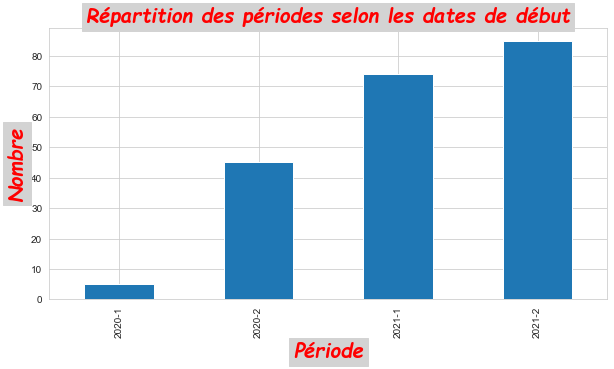

In [72]:
print("Répartition des périodes selon les dates de fin est :", df.groupby("périodeAnnuelleFin")["dispositif"].count())
périodeFin = df.groupby("périodeAnnuelleFin")["dispositif"].count().plot(kind="bar", figsize=(10,5))
périodeFin.set_xlabel("Période", fontdict=fontdict)
périodeFin.set_ylabel("Nombre", fontdict=fontdict)
périodeFin.set_title("Répartition des périodes selon les dates de début", fontdict=fontdict)

## Analyse de jour

Text(0.5, 1.0, 'Répartition des jours')

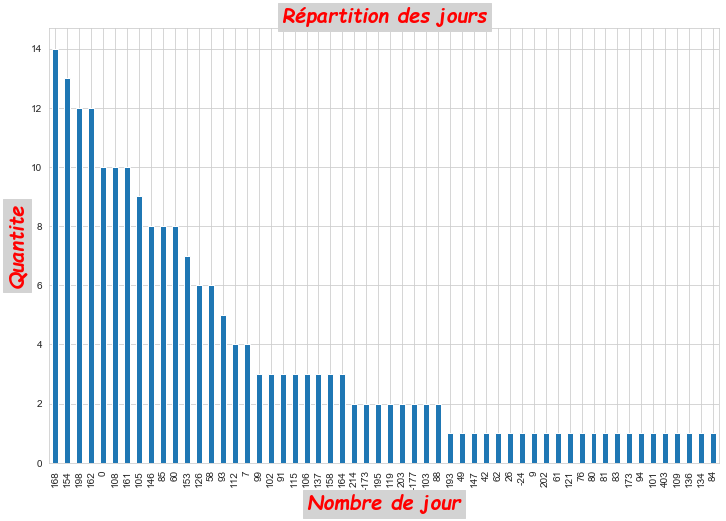

In [73]:
jour = df.jourChiffres.value_counts(ascending=False, sort=True).plot(kind="bar", figsize=(12,8))
jour.set_xlabel("Nombre de jour", fontdict=fontdict)
jour.set_ylabel("Quantite", fontdict=fontdict)
jour.set_title("Répartition des jours", fontdict=fontdict)

# Tableau général

In [74]:
#df.groupby("dispositif")["statue"].value_counts()

In [75]:
df.groupby(["dispositif", "site"])["statue"].value_counts()

dispositif  site                   statue       
AC          Autre Lieu Delocalise  intervenant-e     1
            La Ferte-Mace          beneficiaire      1
                                   intervenant-e     1
BC          Argentan               beneficiaire      1
                                   intervenant-e     1
                                   prescripteur      1
            Avranches              beneficiaire      1
            Flers                  beneficiaire      2
            Saint-Lo               beneficiaire      6
                                   intervenant-e     3
                                   prescripteur      3
            Vire                   intervenant-e    20
                                   beneficiaire     16
                                   prescripteur      9
FA          Autre Lieu Delocalise  intervenant-e     1
            Vire                   beneficiaire      6
                                   financeur         1
                

# Analysis de Questionnaire de Finaceur

In [76]:
print("Il ya", len(df.statue), "statue resultat.")
print(df.statue.value_counts())

Il ya 209 statue resultat.
beneficiaire     125
intervenant-e     54
prescripteur      23
financeur          7
Name: statue, dtype: int64


In [77]:
dfFin = df[df.statue =="financeur"]

In [78]:
dfFin.head()

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021,1,20,1,2021-1,2021-06-15,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,Autre Lieu Delocalise,2020-12-01,2020,12,1,2,2020-2,2020-12-01,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021,5,17,1,2021-1,2021-07-16,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02
145,FA,Vire,2021-08-30,2021,8,30,2,2021-2,2021-08-30,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30 14:03:26
149,Remob,Avranches,2021-02-16,2021,2,16,1,2021-1,2021-09-02,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bon déroulement du bilan, à poursuivre. Bonne ...",Valoriser la progression durant l'action.,2021-09-07 09:43:37


In [79]:
dfFin.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7', 'comment',
       'proposition', 'register_date'],
      dtype='object')

In [80]:
dfFin.drop(columns=['intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7'], axis = 1, inplace = True)

In [81]:
dfFin.head(1)

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,statue,branche,fin1,fin2,fin3,fin4,fin5,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021,1,20,1,2021-1,2021-06-15,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23


In [82]:
dfFin.rename(columns={"fin1":"Disponibilité", "fin2": "Administratif", "fin3": "Respect", "fin4":"Cohérence", "fin5": "Supports"}, inplace=True)

In [83]:
dfFin.head(1)

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,statue,branche,Disponibilité,Administratif,Respect,Cohérence,Supports,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021,1,20,1,2021-1,2021-06-15,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23


In [84]:
dfFin.loc[99, :]

dispositif                                                           PIP
site                                                            Argentan
debut                                                2021-01-20 00:00:00
annéeDebut                                                          2021
moisDebut                                                              1
jourDebut                                                             20
périodeDebut                                                           1
périodeAnnuelleDebut                                              2021-1
fin                                                  2021-06-15 00:00:00
annéeFin                                                            2021
moisFin                                                                6
jourFin                                                               15
périodeFin                                                             1
périodeAnnuelleFin                                 

## Gérer les valeurs manquantes 

In [85]:
dfFin.isnull().sum()

dispositif              0
site                    0
debut                   0
annéeDebut              0
moisDebut               0
jourDebut               0
périodeDebut            0
périodeAnnuelleDebut    0
fin                     0
annéeFin                0
moisFin                 0
jourFin                 0
périodeFin              0
périodeAnnuelleFin      0
jour                    0
jourChiffres            0
statue                  0
branche                 0
Disponibilité           0
Administratif           0
Respect                 0
Cohérence               0
Supports                0
comment                 1
proposition             4
register_date           0
dtype: int64

In [86]:
dfFin.loc[149,  "Disponibilité":"Supports"]

Disponibilité                   on
Administratif         Satisfaisant
Respect               Satisfaisant
Cohérence        Très satisfaisant
Supports         Très satisfaisant
Name: 149, dtype: object

In [87]:
dfFin.at[149, "Disponibilité"]="Satisfaisant"

In [88]:
map_dict_fin = {"Très satisfaisant":5, "Satisfaisant":4, "Moyennement satisfaisant":3, "Pas satisfaisant":2, "Non concerné":1}

In [89]:
dfFin.Disponibilité = dfFin.Disponibilité.map(map_dict_fin)
dfFin.Administratif = dfFin.Administratif.map(map_dict_fin)
dfFin.Respect = dfFin.Respect.map(map_dict_fin)
dfFin.Cohérence = dfFin.Cohérence.map(map_dict_fin)
dfFin.Supports = dfFin.Supports.map(map_dict_fin)

In [90]:
dfFin.Disponibilité.fillna(dfFin.Disponibilité.mean(), inplace =True)
dfFin.Administratif.fillna(dfFin.Administratif.mean(), inplace =True)
dfFin.Respect.fillna(dfFin.Administratif.mean(), inplace =True)
dfFin.Cohérence.fillna(dfFin.Administratif.mean(), inplace =True)
dfFin.Supports.fillna(dfFin.Administratif.mean(), inplace =True)

In [91]:
dfFin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 99 to 186
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            7 non-null      object         
 1   site                  7 non-null      object         
 2   debut                 7 non-null      datetime64[ns] 
 3   annéeDebut            7 non-null      int64          
 4   moisDebut             7 non-null      int64          
 5   jourDebut             7 non-null      int64          
 6   périodeDebut          7 non-null      int32          
 7   périodeAnnuelleDebut  7 non-null      object         
 8   fin                   7 non-null      datetime64[ns] 
 9   annéeFin              7 non-null      int64          
 10  moisFin               7 non-null      int64          
 11  jourFin               7 non-null      int64          
 12  périodeFin            7 non-null      int32          
 13  périod

#### Conversion les types des data au integer

In [92]:
dfFin["Disponibilité"].unique()

array([5, 4], dtype=int64)

In [93]:
dfFin["Disponibilité"] = dfFin.Disponibilité.astype("int64")

## Financeur tout les questions

In [94]:
dfFin.groupby(["dispositif", "site"])["Disponibilité","Administratif", "Respect", "Cohérence", "Supports"].agg(["count", "mean"])

Disponibilité      Administratif       \
                                         count mean         count mean   
dispositif site                                                          
FA         Vire                              1    5             1    5   
PH         Autre Lieu Delocalise             1    5             1    5   
PIP        Argentan                          1    5             1    5   
PIS        Argentan                          1    5             1    5   
PS         Bayeux                            1    5             1    5   
           Caen                              1    5             1    5   
Remob      Avranches                         1    4             1    4   

                                 Respect      Cohérence      Supports       
                                   count mean     count mean    count mean  
dispositif site                                                             
FA         Vire                        1    5         1    5        1    5  
PH         Autre Lieu Delocalise       1    5         1    5        1    5  
PIP        Argentan                    1    4         1    4        1    5  
PIS        Argentan                    1    5         1    5        1    5  
PS         Bayeux                      1    5         1    4        1    5  
           Caen                        1    5         1    5        1    5  
Remob      Avranches                   1    4         1    5        1    5

### Tableau general pour Financeur

Text(0.5, 1.0, "Moyennes globales de l'enquête auprès des financeurs")

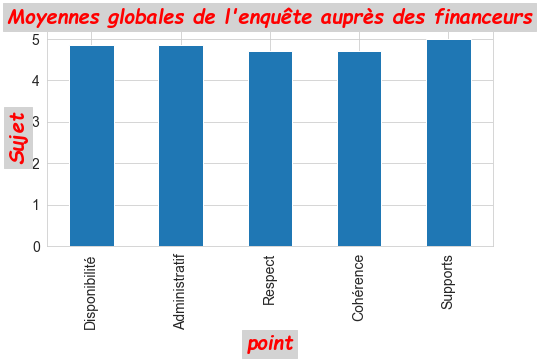

In [95]:
genFin= dfFin[["Disponibilité","Administratif", "Respect","Cohérence", "Supports"]].mean().plot(kind="bar", figsize=(8,4), fontsize=14)
genFin.set_xlabel("point", fontdict=fontdict)
genFin.set_ylabel("Sujet", fontdict=fontdict)
genFin.set_title("Moyennes globales de l'enquête auprès des financeurs", fontdict=fontdict)

### Les averages pour les questions

In [96]:
print("Avarage pour Disponibilité est: ", round(dfFin.Disponibilité.mean(), 1))
print("Avarage pour Administratif est: ", round(dfFin.Administratif.mean(), 1))
print("Avarage pour Respect est: ", round(dfFin.Respect.mean(),1))
print("Avarage pour Cohérence est: ", round(dfFin.Cohérence.mean(), 1))
print("Avarage pour Supports est: ", round(dfFin.Supports.mean(), 1))

Avarage pour Disponibilité est:  4.9
Avarage pour Administratif est:  4.9
Avarage pour Respect est:  4.7
Avarage pour Cohérence est:  4.7
Avarage pour Supports est:  5.0


In [97]:
dfFin[["Disponibilité","Administratif", "Respect","Cohérence", "Supports"]]

,Disponibilité,Administratif,Respect,Cohérence,Supports
99,5,5,4,4,5
108,5,5,5,5,5
127,5,5,5,4,5
145,5,5,5,5,5
149,4,4,4,5,5
161,5,5,5,5,5
186,5,5,5,5,5


### Les Avarages Pour Financeur

#### Question 1: Disponibilité et écoute de votre interlocuteur

Le nombre total de réponses sur Disponibilité est : 5    6
4    1
Name: Disponibilité, dtype: int64
Pourcentage pour Disponibilité est:  5    85.7
4    14.3
Name: Disponibilité, dtype: float64


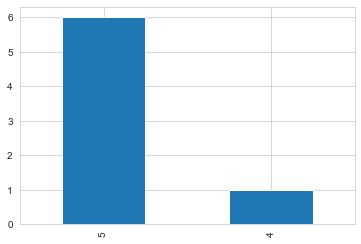

In [98]:
print("Le nombre total de réponses sur Disponibilité est :", dfFin["Disponibilité"].value_counts())
print("Pourcentage pour Disponibilité est: ", round(dfFin["Disponibilité"].value_counts(normalize=True)*100,1))
dfFin.Disponibilité.value_counts().plot(kind="bar")

#### Question 2: Suivi administratif de la prestation (convention, attestations, facturation…)

Le nombre total de réponses sur Administratif est : 5    6
4    1
Name: Administratif, dtype: int64
Avarage pour Administratif est:  5    85.7
4    14.3
Name: Administratif, dtype: float64


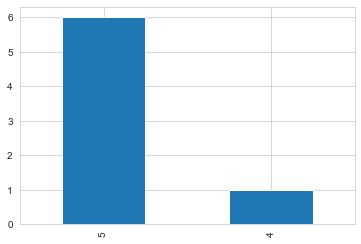

In [99]:
print("Le nombre total de réponses sur Administratif est :", dfFin["Administratif"].value_counts())
print("Avarage pour Administratif est: ", round(dfFin["Administratif"].value_counts(normalize=True)*100,1))
dfFin.Administratif.value_counts().plot(kind="bar")

#### Question 3: Respect des engagements pris

Le nombre total de réponses sur Respect est : 5    5
4    2
Name: Respect, dtype: int64
Avarage pour Respect est:  5    71.4
4    28.6
Name: Respect, dtype: float64


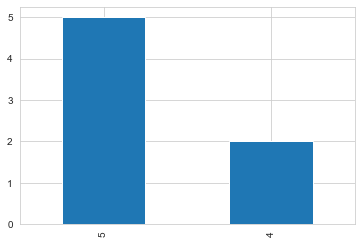

In [100]:
print("Le nombre total de réponses sur Respect est :", dfFin["Respect"].value_counts())
print("Avarage pour Respect est: ", round(dfFin["Respect"].value_counts(normalize=True)*100,1))
dfFin.Respect.value_counts().plot(kind="bar")

#### Question 4: Cohérence des objectifs et des contenus au regard de vos besoins

Le nombre total de réponses sur Cohérence est : 5    5
4    2
Name: Cohérence, dtype: int64
Avarage pour Cohérence est:  5    71.4
4    28.6
Name: Cohérence, dtype: float64


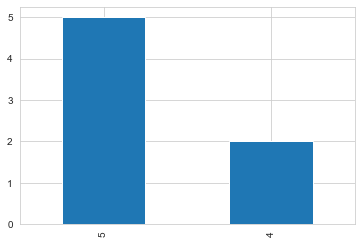

In [101]:
print("Le nombre total de réponses sur Cohérence est :", dfFin["Cohérence"].value_counts())
print("Avarage pour Cohérence est: ", round(dfFin["Cohérence"].value_counts(normalize=True)*100,1))
dfFin.Cohérence.value_counts().plot(kind="bar")

#### Question 5: Supports et moyens pédagogiques mis en œuvre au regard de vos attentes

Le nombre total de réponses sur Supports est : 5    7
Name: Supports, dtype: int64
Avarage pour Supports est:  5    100.0
Name: Supports, dtype: float64


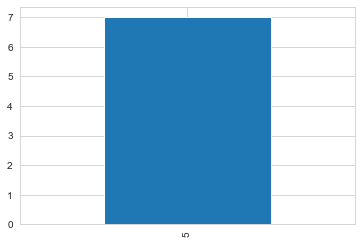

In [102]:
print("Le nombre total de réponses sur Supports est :", dfFin["Supports"].value_counts())
print("Avarage pour Supports est: ", round(dfFin["Supports"].value_counts(normalize=True)*100,1))
dfFin.Supports.value_counts().plot(kind="bar")

# Analysis de Questionnaire de Intervenant-e

In [103]:
print("Il ya", len(df.statue), "statue resultat.")
print(df.statue.value_counts())

Il ya 209 statue resultat.
beneficiaire     125
intervenant-e     54
prescripteur      23
financeur          7
Name: statue, dtype: int64


In [104]:
dfInt = df[df.statue =="intervenant-e"]

In [105]:
dfInt.drop(columns=['fin1', 'fin2', 'fin3', 'fin4', 'fin5',
           'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7'], axis=1, inplace=True)

In [106]:
dfInt.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'intType', 'inter1', 'inter2', 'inter3', 'inter4',
       'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn',
       'intRisqEc', 'comment', 'proposition', 'register_date'],
      dtype='object')

In [107]:
dfInt.rename(columns={'intType': "Type", "inter1":"Objectif", "inter2": "Contenus", "inter3": "Matériel", 
                      "inter4":"Document", "intForDis": "ForDistance", "inter5": "ForDistanceAvis", "intRisqS":"Risque_Social",
                      "intRisqH":"Risque_Hygiène" ,"intRisqJ":"Risque_Juridique","intRisqEn": "Risque_Environ","intRisqEc":"Risque_éco"}, inplace=True)

In [108]:
dfInt.index

Int64Index([  3,   6,  11,  12,  13,  18,  19,  22,  27,  30,  79,  80,  81,
             82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
             95, 118, 119, 121, 123, 130, 133, 144, 147, 153, 154, 155, 156,
            157, 158, 159, 164, 169, 170, 187, 188, 189, 191, 195, 196, 198,
            200, 202],
           dtype='int64')

In [109]:
dfInt.loc[3, :]

dispositif                               BC
site                                   Vire
debut                   2021-02-23 00:00:00
annéeDebut                             2021
moisDebut                                 2
jourDebut                                23
périodeDebut                              1
périodeAnnuelleDebut                 2021-1
fin                     2021-06-08 00:00:00
annéeFin                               2021
moisFin                                   6
jourFin                                   8
périodeFin                                1
périodeAnnuelleFin                   2021-1
jour                      105 days 00:00:00
jourChiffres                            105
statue                        intervenant-e
branche                       intervenant-e
Type                                  Etape
Objectif                        Tout a fait
Contenus                        Tout a fait
Matériel                        Tout a fait
Document                        

In [110]:
dfInt.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'Type', 'Objectif', 'Contenus', 'Matériel',
       'Document', 'ForDistance', 'ForDistanceAvis', 'Risque_Social',
       'Risque_Hygiène', 'Risque_Juridique', 'Risque_Environ', 'Risque_éco',
       'comment', 'proposition', 'register_date'],
      dtype='object')

In [111]:
dfInt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 3 to 202
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            54 non-null     object         
 1   site                  54 non-null     object         
 2   debut                 54 non-null     datetime64[ns] 
 3   annéeDebut            54 non-null     int64          
 4   moisDebut             54 non-null     int64          
 5   jourDebut             54 non-null     int64          
 6   périodeDebut          54 non-null     int32          
 7   périodeAnnuelleDebut  54 non-null     object         
 8   fin                   54 non-null     datetime64[ns] 
 9   annéeFin              54 non-null     int64          
 10  moisFin               54 non-null     int64          
 11  jourFin               54 non-null     int64          
 12  périodeFin            54 non-null     int32          
 13  périod

In [112]:
map_dict_int_Questions = {"Tout a fait":5, "Presque":4, "Pas vraiment":3, "Pas du tout":2}
map_dict_int_ForDistanceAvis = {"Très satisfaisant":5, "Satisfaisant":4, "Moyennement satisfaisant":3, "Insatisfaisant":2}
#map_dict_int_OuiNon = {"Oui":1, "Non":0}

In [113]:
dfInt.Objectif= dfInt.Objectif.map(map_dict_int_Questions)
dfInt.Contenus= dfInt.Contenus.map(map_dict_int_Questions)
dfInt.Matériel= dfInt.Matériel.map(map_dict_int_Questions)
dfInt.Document= dfInt.Document.map(map_dict_int_Questions)
dfInt.ForDistanceAvis= dfInt.ForDistanceAvis.map(map_dict_int_ForDistanceAvis)

In [114]:
dfInt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 3 to 202
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            54 non-null     object         
 1   site                  54 non-null     object         
 2   debut                 54 non-null     datetime64[ns] 
 3   annéeDebut            54 non-null     int64          
 4   moisDebut             54 non-null     int64          
 5   jourDebut             54 non-null     int64          
 6   périodeDebut          54 non-null     int32          
 7   périodeAnnuelleDebut  54 non-null     object         
 8   fin                   54 non-null     datetime64[ns] 
 9   annéeFin              54 non-null     int64          
 10  moisFin               54 non-null     int64          
 11  jourFin               54 non-null     int64          
 12  périodeFin            54 non-null     int32          
 13  périod

### Gérer les valeurs manquantes

In [115]:
dfInt.isnull().sum()

dispositif               0
site                     0
debut                    0
annéeDebut               0
moisDebut                0
jourDebut                0
périodeDebut             0
périodeAnnuelleDebut     0
fin                      0
annéeFin                 0
moisFin                  0
jourFin                  0
périodeFin               0
périodeAnnuelleFin       0
jour                     0
jourChiffres             0
statue                   0
branche                  0
Type                     1
Objectif                 0
Contenus                 2
Matériel                 1
Document                 3
ForDistance              1
ForDistanceAvis         36
Risque_Social            1
Risque_Hygiène          17
Risque_Juridique        18
Risque_Environ          17
Risque_éco              17
comment                 47
proposition             53
register_date            0
dtype: int64

In [116]:
dfInt.Objectif.fillna(dfInt.Objectif.mean(), inplace =True)
dfInt.Contenus.fillna(dfInt.Contenus.mean(), inplace =True)
dfInt.Matériel.fillna(dfInt.Matériel.mean(), inplace =True)
dfInt.Document.fillna(dfInt.Document.mean(), inplace =True)
dfInt.ForDistanceAvis.fillna(dfInt.ForDistanceAvis.mean(), inplace =True)

#### Conversion les types des data au integer

In [117]:
dfInt["Objectif"] = dfInt.Objectif.astype("int64")
dfInt["Contenus"] = dfInt.Contenus.astype("int64")
dfInt["Matériel"] = dfInt.Matériel.astype("int64")
dfInt["Document"] = dfInt.Document.astype("int64")
dfInt["ForDistanceAvis"] = dfInt.ForDistanceAvis.astype("int64")

### Intervenant tout les questions

In [118]:
dfInt.groupby(["dispositif", "site"])["Objectif", "Contenus","Matériel", "Document", "ForDistanceAvis"].agg(["count", "mean"]).round(1)

Objectif      Contenus      Matériel       \
                                    count mean    count mean    count mean   
dispositif site                                                              
AC         Autre Lieu Delocalise        1  4.0        1  5.0        1  5.0   
           La Ferte-Mace                1  5.0        1  5.0        1  5.0   
BC         Argentan                     1  5.0        1  5.0        1  5.0   
           Saint-Lo                     3  5.0        3  5.0        3  5.0   
           Vire                        20  4.9       20  5.0       20  5.0   
FA         Autre Lieu Delocalise        1  5.0        1  5.0        1  5.0   
           Vire                         1  5.0        1  4.0        1  5.0   
GDA        Vire                         5  5.0        5  5.0        5  5.0   
PIS        Argentan                     8  4.6        8  4.8        8  4.8   
           La Ferte-Mace                2  5.0        2  5.0        2  5.0   
PS         Autre Lieu Delocalise        1  5.0        1  5.0        1  5.0   
           Bayeux                       3  5.0        3  5.0        3  5.0   
Remob      Avranches                    7  5.0        7  4.9        7  5.0   

                                 Document      ForDistanceAvis       
                                    count mean           count mean  
dispositif site                                                      
AC         Autre Lieu Delocalise        1  5.0               1  4.0  
           La Ferte-Mace                1  5.0               1  4.0  
BC         Argentan                     1  5.0               1  5.0  
           Saint-Lo                     3  5.0               3  4.3  
           Vire                        20  5.0              20  4.2  
FA         Autre Lieu Delocalise        1  5.0               1  4.0  
           Vire                         1  5.0               1  4.0  
GDA        Vire                         5  5.0               5  4.8  
PIS        Argentan                     8  4.9               8  4.1  
           La Ferte-Mace                2  5.0               2  4.0  
PS         Autre Lieu Delocalise        1  5.0               1  4.0  
           Bayeux                       3  5.0               3  4.3  
Remob      Avranches                    7  4.7               7  4.0

### Tableau general pour Intervenant

Text(0.5, 1.0, "Moyennes globales de l'enquête auprès des intervenants")

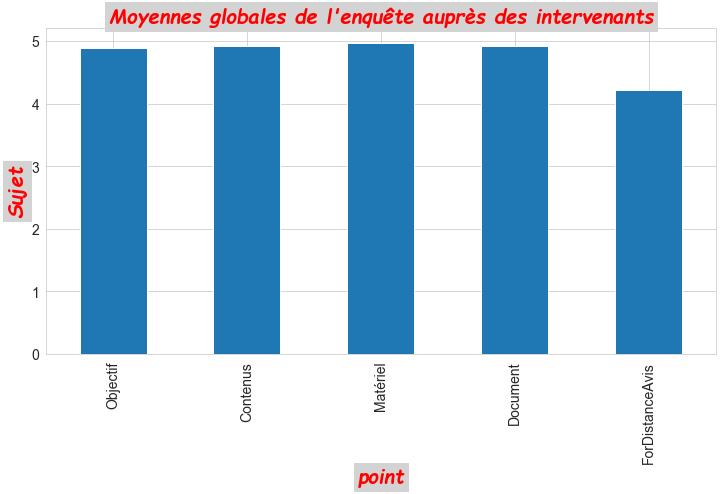

In [119]:
genInt= dfInt[["Objectif","Contenus", "Matériel","Document","ForDistanceAvis"]].mean().plot(kind="bar", 
                figsize=(12,6), fontsize=14)
genInt.set_xlabel("point", fontdict=fontdict)
genInt.set_ylabel("Sujet", fontdict=fontdict)
genInt.set_title("Moyennes globales de l'enquête auprès des intervenants", fontdict=fontdict)

### Les averages pour les questions

In [120]:
print("Avarage pour Objectif est: ", round(dfInt.Objectif.mean(), 1))
print("Avarage pour Contenus est: ", round(dfInt.Contenus.mean(), 1))
print("Avarage pour Matériel est: ", round(dfInt.Matériel.mean(),1))
print("Avarage pour Document est: ", round(dfInt.Document.mean(), 1))
print("Avarage pour ForDistanceAvis est: ", round(dfInt.ForDistanceAvis.mean(), 1))
#print("Avarage pour ForDistance est: ", round(dfInt.ForDistance.mean(), 1))
#print("Avarage pour Risque_Social est: ", round(dfInt.Risque_Social.mean(), 1))
#print("Avarage pour Risque_Hygiène est: ", round(dfInt.Risque_Hygiène.mean(), 1))
#print("Avarage pour Risque_Juridique est: ", round(dfInt.Risque_Juridique.mean(), 1))
#print("Avarage pour Risque_Environ est: ", round(dfInt.Risque_Environ.mean(), 1))
#print("Avarage pour Risque_éco est: ", round(dfInt.Risque_éco.mean(), 1))

Avarage pour Objectif est:  4.9
Avarage pour Contenus est:  4.9
Avarage pour Matériel est:  5.0
Avarage pour Document est:  4.9
Avarage pour ForDistanceAvis est:  4.2


In [121]:
dfInt[["Objectif","Contenus", "Matériel","Document","ForDistanceAvis", "ForDistance", "Risque_Social", "Risque_Hygiène", "Risque_Juridique", "Risque_Environ","Risque_éco"]].head()

,Objectif,Contenus,Matériel,Document,ForDistanceAvis,ForDistance,Risque_Social,Risque_Hygiène,Risque_Juridique,Risque_Environ,Risque_éco
3,5,5,5,5,5,Oui,Non,Non,Non,Non,Non
6,5,5,5,5,4,Non,Non,Non,Non,Non,Non
11,5,5,5,5,5,Oui,Non,Non,Non,Non,Non
12,5,5,5,5,4,Non,Non,Non,Non,Non,Non
13,5,5,5,5,5,Oui,Non,Non,Non,Non,Non


### Les Avarages Pour Intervenant

#### `Question 1`: Les objectifs de la formation ont-ils été atteints ?

Le nombre total de réponses sur Objectif est : 5    48
4     6
Name: Objectif, dtype: int64
Pourcentage pour Objectif est:  5    88.9
4    11.1
Name: Objectif, dtype: float64


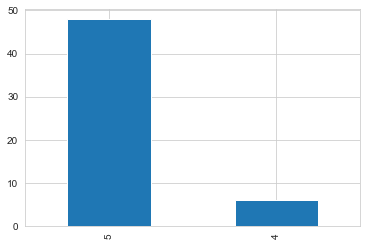

In [122]:
print("Le nombre total de réponses sur Objectif est :", dfInt["Objectif"].value_counts())
print("Pourcentage pour Objectif est: ", round(dfInt["Objectif"].value_counts(normalize=True)*100,1))
dfInt.Objectif.value_counts().plot(kind="bar")

#### `Question 2`: L’équipe a pu aborder l’ensemble des contenus du programme ?

Le nombre total de réponses sur Contenus est : 5    50
4     4
Name: Contenus, dtype: int64
Pourcentage pour Contenus est:  5    92.6
4     7.4
Name: Contenus, dtype: float64


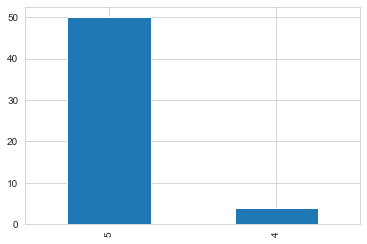

In [123]:
print("Le nombre total de réponses sur Contenus est :", dfInt["Contenus"].value_counts())
print("Pourcentage pour Contenus est: ", round(dfInt["Contenus"].value_counts(normalize=True)*100,1))
dfInt.Contenus.value_counts().plot(kind="bar")

#### `Question 3`: L’équipe a disposé des moyens matériels suffisants pour conduire la prestation ?

Le nombre total de réponses sur Matériel est : 5    52
4     2
Name: Matériel, dtype: int64
Pourcentage pour Matériel est:  5    96.3
4     3.7
Name: Matériel, dtype: float64


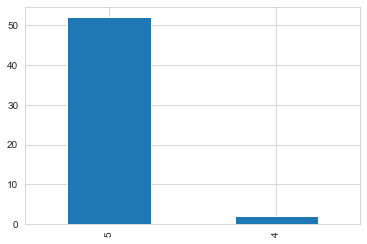

In [124]:
print("Le nombre total de réponses sur Matériel est :", dfInt["Matériel"].value_counts())
print("Pourcentage pour Matériel est: ", round(dfInt["Matériel"].value_counts(normalize=True)*100,1))
dfInt.Matériel.value_counts().plot(kind="bar")

#### `Question 4`: L’équipe a eu accès à tous les documents administratifs et pédagogiques pour mener l’action ?

Le nombre total de réponses sur Document est : 5    50
4     4
Name: Document, dtype: int64
Pourcentage pour Document est:  5    92.6
4     7.4
Name: Document, dtype: float64


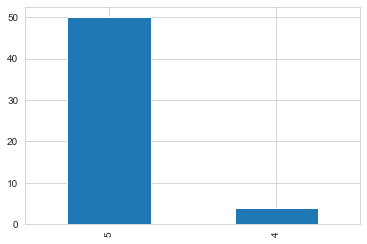

In [125]:
print("Le nombre total de réponses sur Document est :", dfInt["Document"].value_counts())
print("Pourcentage pour Document est: ", round(dfInt["Document"].value_counts(normalize=True)*100,1))
dfInt.Document.value_counts().plot(kind="bar")

#### `Question 5`: Avez-vous réalisé tout ou une partie de la formation en distanciel ?

Le nombre total de réponses sur ForDistance est : Non    38
Oui    15
Name: ForDistance, dtype: int64
Pourcentage pour ForDistance est:  Non    71.7
Oui    28.3
Name: ForDistance, dtype: float64


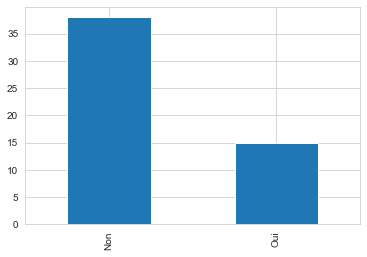

In [126]:
print("Le nombre total de réponses sur ForDistance est :", dfInt["ForDistance"].value_counts())
print("Pourcentage pour ForDistance est: ", round(dfInt["ForDistance"].value_counts(normalize=True)*100,1))
dfInt.ForDistance.value_counts().plot(kind="bar")

#### `Question 6`: (Si le question 5 oui) Votre avis sur la réalisation de tout ou une partie de la prestation en distanciel ?

#### Il y a plus personne qui repondu le question 6

In [127]:
print("Le nombre total de réponses sur ForDistanceAvis est :", dfInt["ForDistanceAvis"].value_counts())
print("Pourcentage pour ForDistanceAvis est: ", round(dfInt["ForDistanceAvis"].value_counts(normalize=True)*100,1))

Le nombre total de réponses sur ForDistanceAvis est : 4    42
5    12
Name: ForDistanceAvis, dtype: int64
Pourcentage pour ForDistanceAvis est:  4    77.8
5    22.2
Name: ForDistanceAvis, dtype: float64


In [128]:
print("Il y a", len(dfInt[dfInt["ForDistance"]=="Oui"]), "person qui dis Oui au question 5")

Il y a 15 person qui dis Oui au question 5


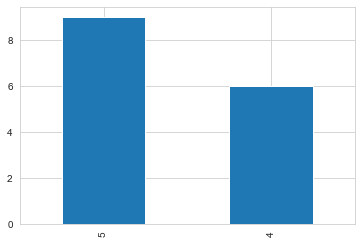

In [129]:
dfInt[dfInt["ForDistance"]=="Oui"]["ForDistanceAvis"].value_counts().plot(kind="bar")

In [130]:
print("L'avarage pour satisfaction sur le formation distance est:", dfInt.groupby("ForDistance")["ForDistanceAvis"].mean()[1].round(2))

L'avarage pour satisfaction sur le formation distance est: 4.6


#### `Question 7`: Risques sociaux (incivilité, discrimination, agression, violence…) ?

Le nombre total de réponses sur Risque_Social est : Non    53
Name: Risque_Social, dtype: int64
Pourcentage pour Risque_Social est:  Non    100.0
Name: Risque_Social, dtype: float64


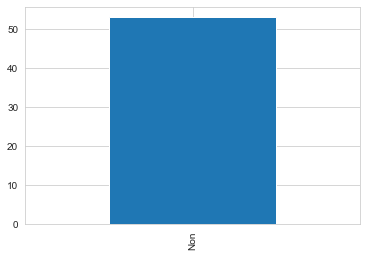

In [131]:
print("Le nombre total de réponses sur Risque_Social est :", dfInt["Risque_Social"].value_counts())
print("Pourcentage pour Risque_Social est: ", round(dfInt["Risque_Social"].value_counts(normalize=True)*100,1))
dfInt.Risque_Social.value_counts().plot(kind="bar")

#### `Question 8`: Risques hygiènes et sécurité des locaux (issue de secours, propreté des locaux…) ?

Le nombre total de réponses sur Risque_Hygiène est : Non    37
Name: Risque_Hygiène, dtype: int64
Pourcentage pour Risque_Hygiène est:  Non    100.0
Name: Risque_Hygiène, dtype: float64


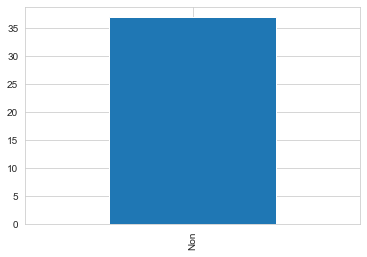

In [132]:
print("Le nombre total de réponses sur Risque_Hygiène est :", dfInt["Risque_Hygiène"].value_counts())
print("Pourcentage pour Risque_Hygiène est: ", round(dfInt["Risque_Hygiène"].value_counts(normalize=True)*100,1))
dfInt.Risque_Hygiène.value_counts().plot(kind="bar")

#### `Question 9`: Risques juridiques (non-respect des éléments contractuels, condition de la période d’immersion en entreprise…) ?

Le nombre total de réponses sur Risque_Juridique est : Non    36
Name: Risque_Juridique, dtype: int64
Pourcentage pour Risque_Juridique est:  Non    100.0
Name: Risque_Juridique, dtype: float64


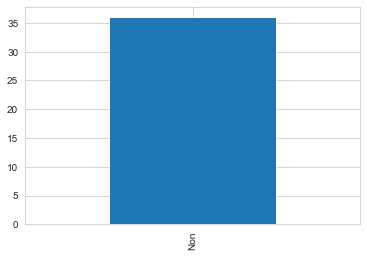

In [133]:
print("Le nombre total de réponses sur Risque_Juridique est :", dfInt["Risque_Juridique"].value_counts())
print("Pourcentage pour Risque_Juridique est: ", round(dfInt["Risque_Juridique"].value_counts(normalize=True)*100,1))
dfInt.Risque_Juridique.value_counts().plot(kind="bar")

#### `Question 10`: Risques environnementaux (absence ou mauvaise gestion des déchets…) ?

Le nombre total de réponses sur Risque_Environ est : Non    37
Name: Risque_Environ, dtype: int64
Pourcentage pour Risque_Environ est:  Non    100.0
Name: Risque_Environ, dtype: float64


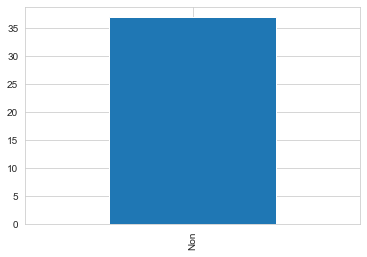

In [134]:
print("Le nombre total de réponses sur Risque_Environ est :", dfInt["Risque_Environ"].value_counts())
print("Pourcentage pour Risque_Environ est: ", round(dfInt["Risque_Environ"].value_counts(normalize=True)*100,1))
dfInt.Risque_Environ.value_counts().plot(kind="bar")

#### `Question 11`: Risques économiques (effectif trop faible, absentéisme…) ?

Le nombre total de réponses sur Risque_éco est : Non    37
Name: Risque_éco, dtype: int64
Pourcentage pour Risque_éco est:  Non    100.0
Name: Risque_éco, dtype: float64


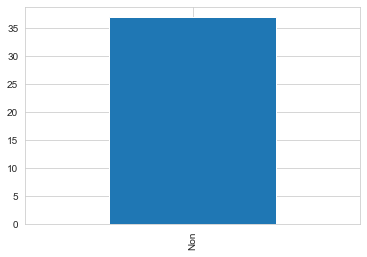

In [135]:
print("Le nombre total de réponses sur Risque_éco est :", dfInt["Risque_éco"].value_counts())
print("Pourcentage pour Risque_éco est: ", round(dfInt["Risque_éco"].value_counts(normalize=True)*100,1))
dfInt.Risque_éco.value_counts().plot(kind="bar")

## Analysis de Questionnaire de Prescripteur

In [136]:
print("Il ya", len(df.statue), "statue resultat.")
print(df.statue.value_counts())

Il ya 209 statue resultat.
beneficiaire     125
intervenant-e     54
prescripteur      23
financeur          7
Name: statue, dtype: int64


In [137]:
dfPres = df[df.statue=="prescripteur"]

In [138]:
dfPres.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7', 'comment',
       'proposition', 'register_date'],
      dtype='object')

In [139]:
dfPres.drop(['fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc','ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7'], axis = 1, inplace = True)
dfPres.loc[1, "preUsager":"pre6"]

preUsager                Autre
pre1         Très satisfaisant
pre2         Très satisfaisant
pre3         Très satisfaisant
pre4         Très satisfaisant
pre5         Très satisfaisant
pre6         Très satisfaisant
Name: 1, dtype: object

In [140]:
dfPres.rename(columns = {"preUsager":"usager" , "pre1":"information" , "pre2":"délais" , "pre3":"organisation", "pre4":"échanges", "pre5":"contenu" , "pre6":"objectifs"}, inplace=True)
dfPres.loc[1, "usager":"objectifs"]

usager                      Autre
information     Très satisfaisant
délais          Très satisfaisant
organisation    Très satisfaisant
échanges        Très satisfaisant
contenu         Très satisfaisant
objectifs       Très satisfaisant
Name: 1, dtype: object

In [141]:
map_dict_Pres = {"Très satisfaisant":5, "Satisfaisant":4, "Moyennement satisfaisant":3, "Pas satisfaisant":2, "Non concerné":1}

In [142]:
dfPres.information= dfPres.information.map(map_dict_Pres)
dfPres.délais= dfPres.délais.map(map_dict_Pres)
dfPres.organisation= dfPres.organisation.map(map_dict_Pres)
dfPres.échanges= dfPres.échanges.map(map_dict_Pres)
dfPres.contenu= dfPres.contenu.map(map_dict_Pres)
dfPres.objectifs= dfPres.objectifs.map(map_dict_Pres)

In [143]:
dfPres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 206
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            23 non-null     object         
 1   site                  23 non-null     object         
 2   debut                 23 non-null     datetime64[ns] 
 3   annéeDebut            23 non-null     int64          
 4   moisDebut             23 non-null     int64          
 5   jourDebut             23 non-null     int64          
 6   périodeDebut          23 non-null     int32          
 7   périodeAnnuelleDebut  23 non-null     object         
 8   fin                   23 non-null     datetime64[ns] 
 9   annéeFin              23 non-null     int64          
 10  moisFin               23 non-null     int64          
 11  jourFin               23 non-null     int64          
 12  périodeFin            23 non-null     int32          
 13  périod

### Gérer les valeurs manquantes

In [144]:
dfPres.isnull().sum()

dispositif               0
site                     0
debut                    0
annéeDebut               0
moisDebut                0
jourDebut                0
périodeDebut             0
périodeAnnuelleDebut     0
fin                      0
annéeFin                 0
moisFin                  0
jourFin                  0
périodeFin               0
périodeAnnuelleFin       0
jour                     0
jourChiffres             0
statue                   0
branche                  0
usager                   1
information              0
délais                   0
organisation             0
échanges                 0
contenu                  0
objectifs                0
comment                 12
proposition             20
register_date            0
dtype: int64

In [145]:
dfPres.usager.isnull()

1      False
4      False
8      False
9      False
14     False
17     False
21     False
23     False
25     False
29     False
98     False
107    False
126    False
129    False
131    False
148    False
160    False
163     True
184    False
185    False
192    False
203    False
206    False
Name: usager, dtype: bool

In [146]:
dfPres.loc[dfPres.usager.isnull() ==True] 

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,usager,information,délais,organisation,échanges,contenu,objectifs,comment,proposition,register_date
163,BC,Vire,2021-05-11,2021,5,11,1,2021-1,2021-09-14,2021,...,NaN,4,5,5,5,4,4,NaN,NaN,2021-10-04 10:15:39


In [147]:
dfPres.usager.value_counts(dropna=False)

Autre                       15
Pôle Emploi                  4
Conseil départemental 61     2
Conseil départemental 50     1
NaN                          1
Name: usager, dtype: int64

In [148]:
dfPres.usager.value_counts(dropna=False).index[0]

'Autre'

#### remplir la valeur manquante par la plus fréquente.

In [149]:
dfPres = dfPres.fillna(dfPres['usager'].value_counts().index[0])

In [150]:
dfPres.isnull().sum().any()

False

### Prescripteur tout les questions

In [151]:
dfPres.groupby(["dispositif"])["information", "délais", "organisation", "échanges", "contenu", "objectifs"].agg(["count", "mean"]).round(1)

information      délais      organisation      échanges       \
                 count mean  count mean        count mean    count mean   
dispositif                                                                
BC                  13  4.9     13    5           13  5.0       13  5.0   
FA                   1  5.0      1    5            1  1.0        1  5.0   
ISU                  1  4.0      1    5            1  5.0        1  5.0   
PH                   1  4.0      1    1            1  1.0        1  4.0   
PIP                  1  5.0      1    5            1  5.0        1  5.0   
PIS                  3  4.0      3    4            3  4.0        3  4.7   
PS                   2  4.5      2    4            2  4.5        2  5.0   
Remob                1  5.0      1    5            1  5.0        1  5.0   

           contenu      objectifs       
             count mean     count mean  
dispositif                              
BC              13  4.9        13  4.8  
FA               1  5.0         1  5.0  
ISU              1  5.0         1  5.0  
PH               1  1.0         1  1.0  
PIP              1  4.0         1  4.0  
PIS              3  4.7         3  4.7  
PS               2  5.0         2  4.5  
Remob            1  5.0         1  5.0

In [152]:
dfPres.groupby(["dispositif", "site"])["information", "délais", "organisation", "échanges", "contenu", "objectifs"].agg(["count", "mean"]).round(1)

information      délais      organisation  \
                                       count mean  count mean        count   
dispositif site                                                              
BC         Argentan                        1  5.0      1    5            1   
           Saint-Lo                        3  5.0      3    5            3   
           Vire                            9  4.9      9    5            9   
FA         Vire                            1  5.0      1    5            1   
ISU        Autre Lieu Delocalise           1  4.0      1    5            1   
PH         Vire                            1  4.0      1    1            1   
PIP        Argentan                        1  5.0      1    5            1   
PIS        Argentan                        3  4.0      3    4            3   
PS         Bayeux                          1  5.0      1    4            1   
           Caen                            1  4.0      1    4            1   
Remob      Avranches                       1  5.0      1    5            1   

                                      échanges      contenu      objectifs  \
                                 mean    count mean   count mean     count   
dispositif site                                                              
BC         Argentan                 5        1  5.0       1  5.0         1   
           Saint-Lo                 5        3  5.0       3  5.0         3   
           Vire                     5        9  5.0       9  4.9         9   
FA         Vire                     1        1  5.0       1  5.0         1   
ISU        Autre Lieu Delocalise    5        1  5.0       1  5.0         1   
PH         Vire                     1        1  4.0       1  1.0         1   
PIP        Argentan                 5        1  5.0       1  4.0         1   
PIS        Argentan                 4        3  4.7       3  4.7         3   
PS         Bayeux                   4        1  5.0       1  5.0         1   
           Caen                     5        1  5.0       1  5.0         1   
Remob      Avranches                5        1  5.0       1  5.0         1   

                                       
                                 mean  
dispositif site                        
BC         Argentan               5.0  
           Saint-Lo               4.7  
           Vire                   4.9  
FA         Vire                   5.0  
ISU        Autre Lieu Delocalise  5.0  
PH         Vire                   1.0  
PIP        Argentan               4.0  
PIS        Argentan               4.7  
PS         Bayeux                 5.0  
           Caen                   4.0  
Remob      Avranches              5.0

### Tableau general pour Prescripteur

Text(0.5, 1, "Moyennes globales de l'enquête auprès des intervenants")

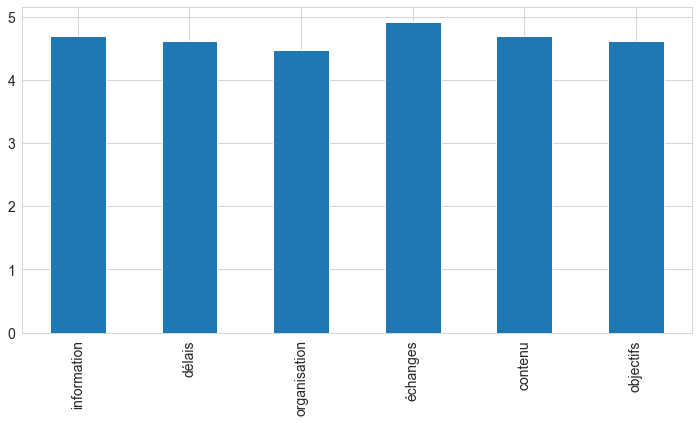

In [153]:
genPres= dfPres[["information","délais", "organisation","échanges","contenu", "objectifs"]].mean().plot(kind="bar", 
                figsize=(12,6), fontsize=14)
genInt.set_xlabel("point", fontdict=fontdict)
genInt.set_ylabel("Sujet", fontdict=fontdict)
genInt.set_title("Moyennes globales de l'enquête auprès des intervenants", fontdict=fontdict)

### Les averages pour les questions

In [154]:
print("Avarage pour information est: ", round(dfPres.information.mean(), 1))
print("Avarage pour délais est: ", round(dfPres.délais.mean(), 1))
print("Avarage pour organisation est: ", round(dfPres.organisation.mean(),1))
print("Avarage pour échanges est: ", round(dfPres.échanges.mean(), 1))
print("Avarage pour contenu est: ", round(dfPres.contenu.mean(), 1))
print("Avarage pour objectifs est: ", round(dfPres.objectifs.mean(), 1))

Avarage pour information est:  4.7
Avarage pour délais est:  4.6
Avarage pour organisation est:  4.5
Avarage pour échanges est:  4.9
Avarage pour contenu est:  4.7
Avarage pour objectifs est:  4.6


### Questions

`Question 1`: Accès aux informations en amont de la prestation

Accès aux informations en amont de la prestation est : 5    16
4     7
Name: information, dtype: int64
Pourcentage pour information est:  5    69.6
4    30.4
Name: information, dtype: float64


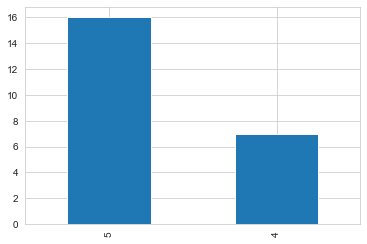

In [155]:
print("Accès aux informations en amont de la prestation est :", dfPres["information"].value_counts())
print("Pourcentage pour information est: ", round(dfPres["information"].value_counts(normalize=True)*100,1))
dfPres.information.value_counts().plot(kind="bar")

`Question 2`: Délais de traitement de votre prescription

Délais de traitement de votre prescription est : 5    17
4     5
1     1
Name: délais, dtype: int64
Pourcentage pour information est:  5    73.9
4    21.7
1     4.3
Name: délais, dtype: float64


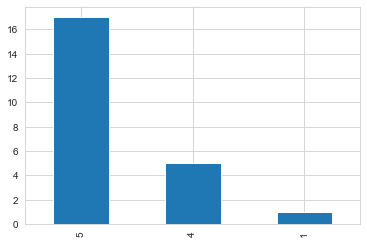

In [156]:
print("Délais de traitement de votre prescription est :", dfPres["délais"].value_counts())
print("Pourcentage pour information est: ", round(dfPres["délais"].value_counts(normalize=True)*100,1))
dfPres.délais.value_counts().plot(kind="bar")

`Question 3`: Organisation du recrutement

Organisation du recrutement est : 5    17
4     4
1     2
Name: organisation, dtype: int64
Pourcentage pour organisation est:  5    73.9
4    17.4
1     8.7
Name: organisation, dtype: float64


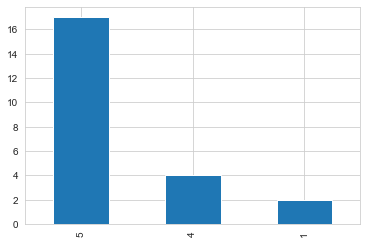

In [157]:
print("Organisation du recrutement est :", dfPres["organisation"].value_counts())
print("Pourcentage pour organisation est: ", round(dfPres["organisation"].value_counts(normalize=True)*100,1))
dfPres.organisation.value_counts().plot(kind="bar")

`Question 4`: Échanges durant la prestation

Échanges durant la prestation est : 5    21
4     2
Name: échanges, dtype: int64
Pourcentage pour information est:  5    91.3
4     8.7
Name: échanges, dtype: float64


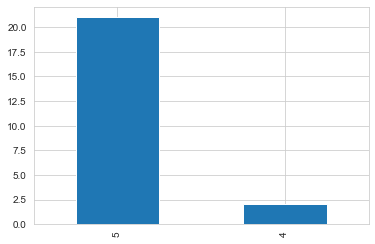

In [158]:
print("Échanges durant la prestation est :", dfPres["échanges"].value_counts())
print("Pourcentage pour information est: ", round(dfPres["échanges"].value_counts(normalize=True)*100,1))
dfPres.échanges.value_counts().plot(kind="bar")

`Question 5`: Forme et contenu de la restitution de fin de prestation

Forme et contenu de la restitution de fin de prestation est : 5    19
4     3
1     1
Name: contenu, dtype: int64
Pourcentage pour contenu est:  5    82.6
4    13.0
1     4.3
Name: contenu, dtype: float64


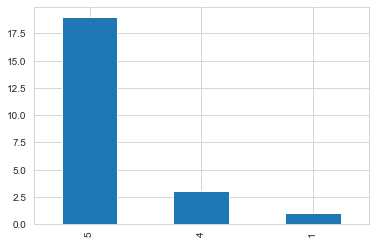

In [159]:
print("Forme et contenu de la restitution de fin de prestation est :", dfPres["contenu"].value_counts())
print("Pourcentage pour contenu est: ", round(dfPres["contenu"].value_counts(normalize=True)*100,1))
dfPres.contenu.value_counts().plot(kind="bar")

`Question 6`: Degré de réalisation des objectifs de la prestation

Degré de réalisation des objectifs de la prestation est : 5    17
4     5
1     1
Name: objectifs, dtype: int64
Pourcentage pour objectifs est:  5    73.9
4    21.7
1     4.3
Name: objectifs, dtype: float64


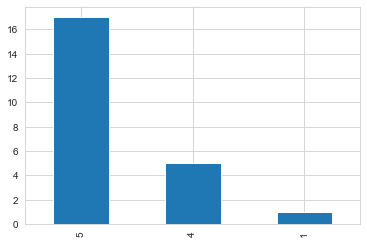

In [160]:
print("Degré de réalisation des objectifs de la prestation est :", dfPres["objectifs"].value_counts())
print("Pourcentage pour objectifs est: ", round(dfPres["objectifs"].value_counts(normalize=True)*100,1))
dfPres.objectifs.value_counts().plot(kind="bar")

## Analysis de Questionnaire de Beneficiare

In [161]:
print("Il ya", len(df.statue), "statue resultat.")
print(df.statue.value_counts())

Il ya 209 statue resultat.
beneficiaire     125
intervenant-e     54
prescripteur      23
financeur          7
Name: statue, dtype: int64


In [162]:
dfBen = df[df.statue=="beneficiaire"]

In [163]:
dfBen.drop(['fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6'], axis = 1, inplace = True)

In [164]:
dfBen.loc[0, :]

dispositif                                                             BC
site                                                            Avranches
debut                                                 2021-02-03 00:00:00
annéeDebut                                                           2021
moisDebut                                                               2
jourDebut                                                               3
périodeDebut                                                            1
périodeAnnuelleDebut                                               2021-1
fin                                                   2021-06-04 00:00:00
annéeFin                                                             2021
moisFin                                                                 6
jourFin                                                                 4
périodeFin                                                              1
périodeAnnuelleFin                    

In [165]:
dfBen.rename(columns = {"ben1":"cohérence", "ben2":"contenus", "ben3":"moyens" , "ben4":"fréquenceContacts" , "ben5": "objectif", "ben6":"action", "ben7":"handicap"}, inplace = True)
dfBen.loc[0, :]

dispositif                                                             BC
site                                                            Avranches
debut                                                 2021-02-03 00:00:00
annéeDebut                                                           2021
moisDebut                                                               2
jourDebut                                                               3
périodeDebut                                                            1
périodeAnnuelleDebut                                               2021-1
fin                                                   2021-06-04 00:00:00
annéeFin                                                             2021
moisFin                                                                 6
jourFin                                                                 4
périodeFin                                                              1
périodeAnnuelleFin                    

In [166]:
map_dict_Ben = {"Très satisfaisant":5, "Satisfaisant":4, "Peu satisfaisant":3, "Pas du tout satisfaisant":2}

In [167]:
dfBen.cohérence= dfBen.cohérence.map(map_dict_Ben)
dfBen.contenus= dfBen.contenus.map(map_dict_Ben)
dfBen.moyens= dfBen.moyens.map(map_dict_Ben)
dfBen.fréquenceContacts= dfBen.fréquenceContacts.map(map_dict_Ben)
dfBen.objectif= dfBen.objectif.map(map_dict_Ben)
dfBen.action= dfBen.action.map(map_dict_Ben)
dfBen.handicap= dfBen.handicap.map(map_dict_Ben)

In [168]:
dfBen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 208
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            125 non-null    object         
 1   site                  125 non-null    object         
 2   debut                 125 non-null    datetime64[ns] 
 3   annéeDebut            125 non-null    int64          
 4   moisDebut             125 non-null    int64          
 5   jourDebut             125 non-null    int64          
 6   périodeDebut          125 non-null    int32          
 7   périodeAnnuelleDebut  125 non-null    object         
 8   fin                   125 non-null    datetime64[ns] 
 9   annéeFin              125 non-null    int64          
 10  moisFin               125 non-null    int64          
 11  jourFin               125 non-null    int64          
 12  périodeFin            125 non-null    int32          
 13  pério

### Gérer les valeurs manquantes

In [169]:
dfBen.isnull().sum()

dispositif               0
site                     0
debut                    0
annéeDebut               0
moisDebut                0
jourDebut                0
périodeDebut             0
périodeAnnuelleDebut     0
fin                      0
annéeFin                 0
moisFin                  0
jourFin                  0
périodeFin               0
périodeAnnuelleFin       0
jour                     0
jourChiffres             0
statue                   0
branche                  0
cohérence                1
contenus                 1
moyens                   1
fréquenceContacts        0
objectif                 1
action                   3
handicap                84
comment                 63
proposition             99
register_date            0
dtype: int64

In [170]:
dfBen.cohérence.value_counts(dropna= False)

5.0    75
4.0    49
NaN     1
Name: cohérence, dtype: int64

In [171]:
dfBen.cohérence.value_counts().index[0]

5.0

In [172]:
dfBen.cohérence.fillna(dfBen.cohérence.value_counts().index[0], inplace = True)
dfBen.contenus.fillna(dfBen.cohérence.value_counts().index[0], inplace = True)
dfBen.moyens.fillna(dfBen.cohérence.value_counts().index[0], inplace = True)
dfBen.objectif.fillna(dfBen.objectif.value_counts().index[0], inplace = True)
dfBen.action.fillna(dfBen.action.value_counts().index[0], inplace = True)

In [173]:
dfBen.isnull().sum()

dispositif               0
site                     0
debut                    0
annéeDebut               0
moisDebut                0
jourDebut                0
périodeDebut             0
périodeAnnuelleDebut     0
fin                      0
annéeFin                 0
moisFin                  0
jourFin                  0
périodeFin               0
périodeAnnuelleFin       0
jour                     0
jourChiffres             0
statue                   0
branche                  0
cohérence                0
contenus                 0
moyens                   0
fréquenceContacts        0
objectif                 0
action                   0
handicap                84
comment                 63
proposition             99
register_date            0
dtype: int64

In [174]:
dfBen.cohérence = dfBen.cohérence.astype("int64")
dfBen.contenus = dfBen.contenus.astype("int64")
dfBen.moyens = dfBen.moyens.astype("int64")
dfBen.fréquenceContacts = dfBen.fréquenceContacts.astype("int64")
dfBen.objectif = dfBen.objectif.astype("int64")
dfBen.action = dfBen.action.astype("int64")

### Beneficiaire tout les questions

In [175]:
dfBen.groupby(["dispositif"])["cohérence", "contenus", "moyens", "fréquenceContacts", "objectif", "action"].agg(["count", "mean"]).round(1)

cohérence      contenus      moyens      fréquenceContacts       \
               count mean    count mean  count mean             count mean   
dispositif                                                                   
AC                 1  5.0        1  5.0      1  5.0                 1  5.0   
BC                26  4.7       26  4.9     26  4.8                26  4.9   
FA                 6  4.8        6  5.0      6  5.0                 6  4.7   
GDA                7  4.7        7  4.7      7  4.7                 7  5.0   
ISU                1  5.0        1  5.0      1  5.0                 1  5.0   
PIP               26  4.4       26  4.6     26  4.6                26  4.8   
PIS               23  4.5       23  4.5     23  4.7                23  4.7   
PS                31  4.7       31  4.8     31  4.8                31  4.9   
Remob              4  4.2        4  4.2      4  4.0                 4  4.8   

           objectif      action       
              count mean  count mean  
dispositif                            
AC                1  5.0      1  5.0  
BC               26  4.6     26  4.7  
FA                6  4.7      6  4.8  
GDA               7  4.6      7  4.9  
ISU               1  5.0      1  5.0  
PIP              26  4.5     26  4.7  
PIS              23  4.3     23  4.6  
PS               31  4.5     31  4.8  
Remob             4  4.0      4  4.5

In [176]:
dfBen.groupby(["dispositif", "site"])["cohérence", "contenus", "moyens", "fréquenceContacts", "objectif", "action"].agg(["count", "mean"]).round(1)

cohérence      contenus      moyens       \
                                     count mean    count mean  count mean   
dispositif site                                                             
AC         La Ferte-Mace                 1  5.0        1  5.0      1  5.0   
BC         Argentan                      1  5.0        1  5.0      1  5.0   
           Avranches                     1  5.0        1  5.0      1  5.0   
           Flers                         2  4.5        2  4.5      2  5.0   
           Saint-Lo                      6  4.7        6  5.0      6  5.0   
           Vire                         16  4.7       16  4.9     16  4.7   
FA         Vire                          6  4.8        6  5.0      6  5.0   
GDA        Vire                          7  4.7        7  4.7      7  4.7   
ISU        Vire                          1  5.0        1  5.0      1  5.0   
PIP        Argentan                      7  4.4        7  4.6      7  4.4   
           Domfront                     13  4.4       13  4.6     13  4.5   
           Flers                         6  4.5        6  4.7      6  4.8   
PIS        Argentan                     15  4.4       15  4.4     15  4.6   
           La Ferte-Mace                 8  4.6        8  4.8      8  4.8   
PS         Autre Lieu Delocalise        21  4.6       21  4.7     21  4.8   
           Bayeux                        4  5.0        4  5.0      4  5.0   
           Falaise                       6  5.0        6  5.0      6  5.0   
Remob      Avranches                     4  4.2        4  4.2      4  4.0   

                                 fréquenceContacts      objectif      action  \
                                             count mean    count mean  count   
dispositif site                                                                
AC         La Ferte-Mace                         1  5.0        1  5.0      1   
BC         Argentan                              1  5.0        1  5.0      1   
           Avranches                             1  5.0        1  3.0      1   
           Flers                                 2  5.0        2  4.0      2   
           Saint-Lo                              6  4.8        6  4.7      6   
           Vire                                 16  4.9       16  4.7     16   
FA         Vire                                  6  4.7        6  4.7      6   
GDA        Vire                                  7  5.0        7  4.6      7   
ISU        Vire                                  1  5.0        1  5.0      1   
PIP        Argentan                              7  4.9        7  4.6      7   
           Domfront                             13  4.8       13  4.3     13   
           Flers                                 6  4.8        6  4.7      6   
PIS        Argentan                             15  4.6       15  4.3     15   
           La Ferte-Mace                         8  4.8        8  4.4      8   
PS         Autre Lieu Delocalise                21  4.9       21  4.3     21   
           Bayeux                                4  5.0        4  4.8      4   
           Falaise                               6  5.0        6  4.8      6   
Remob      Avranches                             4  4.8        4  4.0      4   

                                       
                                 mean  
dispositif site                        
AC         La Ferte-Mace          5.0  
BC         Argentan               5.0  
           Avranches              5.0  
           Flers                  4.0  
           Saint-Lo               4.7  
           Vire                   4.7  
FA         Vire                   4.8  
GDA        Vire                   4.9  
ISU        Vire                   5.0  
PIP        Argentan               4.6  
           Domfront               4.7  
           Flers                  4.8  
PIS        Argentan               4.6  
           La Ferte-Mace          4.5  
PS         Autre Lieu Delocalise  4.8  
           Bay

### Tableau general pour Prescripteur

Text(0.5, 1.0, "Moyennes globales de l'enquête auprès des intervenants")

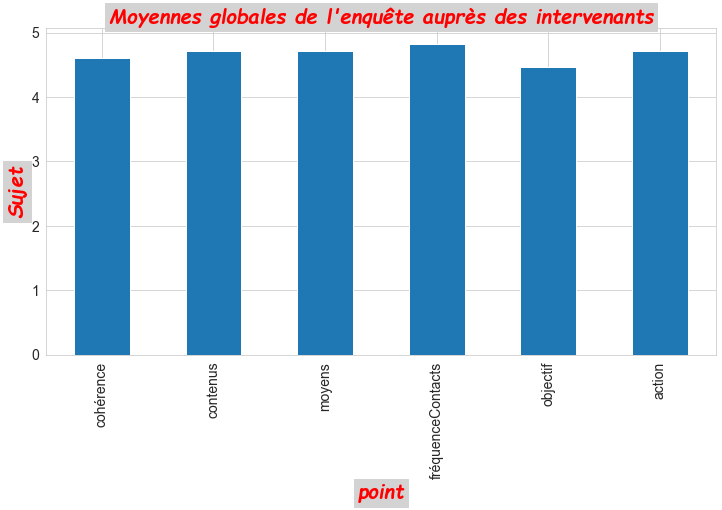

In [177]:
genBen= dfBen[["cohérence","contenus", "moyens","fréquenceContacts","objectif", "action"]].mean().plot(kind="bar", 
                figsize=(12,6), fontsize=14)
genBen.set_xlabel("point", fontdict=fontdict)
genBen.set_ylabel("Sujet", fontdict=fontdict)
genBen.set_title("Moyennes globales de l'enquête auprès des intervenants", fontdict=fontdict)

### Les averages pour les questions

In [178]:
print("Avarage pour cohérence est: ", round(dfBen.cohérence.mean(), 1))
print("Avarage pour contenus est: ", round(dfBen.contenus.mean(), 1))
print("Avarage pour moyens est: ", round(dfBen.moyens.mean(),1))
print("Avarage pour fréquenceContacts est: ", round(dfBen.fréquenceContacts.mean(), 1))
print("Avarage pour objectif est: ", round(dfBen.objectif.mean(), 1))
print("Avarage pour action est: ", round(dfBen.action.mean(), 1))

Avarage pour cohérence est:  4.6
Avarage pour contenus est:  4.7
Avarage pour moyens est:  4.7
Avarage pour fréquenceContacts est:  4.8
Avarage pour objectif est:  4.5
Avarage pour action est:  4.7


### Les Questions

`Questions 1`: La cohérence de cette formation/prestation par rapport à vos besoins ?

La cohérence de cette formation/prestation par rapport à vos besoins est : 5    76
4    49
Name: cohérence, dtype: int64
Pourcentage pour cohérence est:  5    60.8
4    39.2
Name: cohérence, dtype: float64


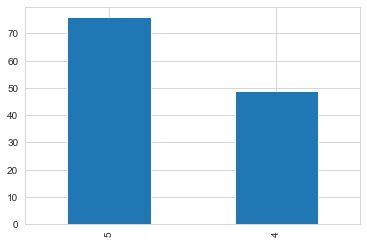

In [179]:
print("La cohérence de cette formation/prestation par rapport à vos besoins est :", dfBen["cohérence"].value_counts())
print("Pourcentage pour cohérence est: ", round(dfBen["cohérence"].value_counts(normalize=True)*100,1))
dfBen.cohérence.value_counts().plot(kind="bar")

`Questions 2`: La conformité des contenus de cette formation par rapport au descriptif annoncé ?

La conformité des contenus de cette formation par rapport au descriptif annoncé est : 5    90
4    35
Name: contenus, dtype: int64
Pourcentage pour contenus est:  5    72.0
4    28.0
Name: contenus, dtype: float64


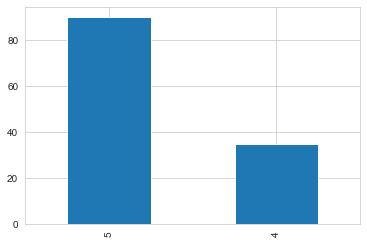

In [180]:
print("La conformité des contenus de cette formation par rapport au descriptif annoncé est :", dfBen["contenus"].value_counts())
print("Pourcentage pour contenus est: ", round(dfBen["contenus"].value_counts(normalize=True)*100,1))
dfBen.contenus.value_counts().plot(kind="bar")

`Questions 3`: Les moyens mis à votre disposition étaient-ils satisfaisants ?

 Les moyens mis à votre disposition étaient-ils satisfaisants est : 5    91
4    33
3     1
Name: moyens, dtype: int64
Pourcentage pour moyens est:  5    72.8
4    26.4
3     0.8
Name: moyens, dtype: float64


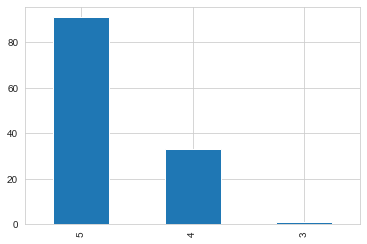

In [181]:
print(" Les moyens mis à votre disposition étaient-ils satisfaisants est :", dfBen["moyens"].value_counts())
print("Pourcentage pour moyens est: ", round(dfBen["moyens"].value_counts(normalize=True)*100,1))
dfBen.moyens.value_counts().plot(kind="bar")

`Questions 4`: Etes-vous satisfait-e de la fréquence des contacts avec le-la référent-e L’Étape ?

Satisfaction de la fréquence des contacts avec le-la référent-e L’Étape est : 5    103
4     22
Name: fréquenceContacts, dtype: int64
Pourcentage pour fréquenceContacts est:  5    72.8
4    26.4
3     0.8
Name: moyens, dtype: float64


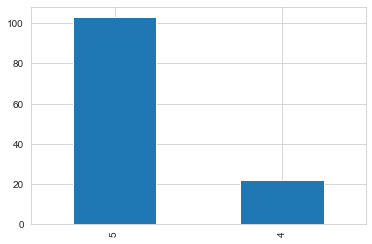

In [182]:
print("Satisfaction de la fréquence des contacts avec le-la référent-e L’Étape est :", dfBen["fréquenceContacts"].value_counts())
print("Pourcentage pour fréquenceContacts est: ", round(dfBen["moyens"].value_counts(normalize=True)*100,1))
dfBen.fréquenceContacts.value_counts().plot(kind="bar")

`Questions 5`: Votre objectif a-t-il été atteint ?

 Les objectifs est : 5    63
4    58
3     4
Name: objectif, dtype: int64
Pourcentage pour objectif est:  5    50.4
4    46.4
3     3.2
Name: objectif, dtype: float64


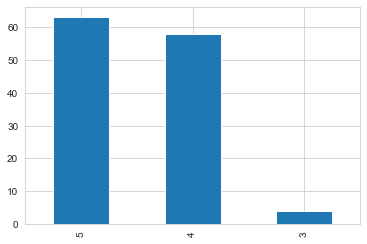

In [183]:
print(" Les objectifs est :", dfBen["objectif"].value_counts())
print("Pourcentage pour objectif est: ", round(dfBen["objectif"].value_counts(normalize=True)*100,1))
dfBen.objectif.value_counts().plot(kind="bar")

`Questions 6`: Etes-vous satisfait-e de l’action mise en place ?

Satisfaction des actions est : 5    90
4    34
3     1
Name: action, dtype: int64
Pourcentage pour action est:  5    72.0
4    27.2
3     0.8
Name: action, dtype: float64


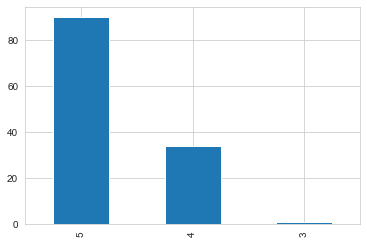

In [184]:
print("Satisfaction des actions est :", dfBen["action"].value_counts())
print("Pourcentage pour action est: ", round(dfBen["action"].value_counts(normalize=True)*100,1))
dfBen.action.value_counts().plot(kind="bar")

`Questions 7`: Si vous êtes en situation de handicap, votre handicap a-t-il été pris en compte ?

In [185]:
dfBen.handicap.value_counts(dropna=False)

NaN    84
5.0    27
4.0    13
3.0     1
Name: handicap, dtype: int64

Prendre en compte de handicap est : NaN    84
5.0    27
4.0    13
3.0     1
Name: handicap, dtype: int64
Pourcentage pour handicap est:  NaN    67.2
5.0    21.6
4.0    10.4
3.0     0.8
Name: handicap, dtype: float64


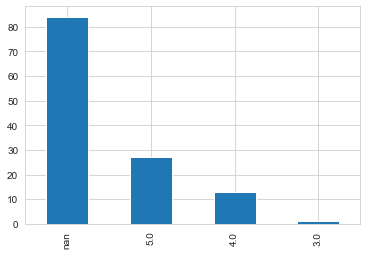

In [186]:
print("Prendre en compte de handicap est :", dfBen["handicap"].value_counts(dropna=False))
print("Pourcentage pour handicap est: ", round(dfBen["handicap"].value_counts(normalize=True, dropna=False)*100,1))
dfBen.handicap.value_counts(dropna=False).plot(kind="bar")

## Les avareges par rapport les dispositifs

In [187]:
df.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7', 'comment',
       'proposition', 'register_date'],
      dtype='object')

In [189]:
dfFin[["dispositif", 'Disponibilité', 'Administratif', 'Respect',
       'Cohérence', 'Supports']][0:1]

,dispositif,Disponibilité,Administratif,Respect,Cohérence,Supports
99,PIP,5,5,4,4,5


In [190]:
dfFin.groupby("dispositif")[ 'Disponibilité', 'Administratif', 'Respect',
       'Cohérence', 'Supports'].mean()

,Disponibilité,Administratif,Respect,Cohérence,Supports
dispositif,,,,,
FA,5.0,5.0,5.0,5.0,5.0
PH,5.0,5.0,5.0,5.0,5.0
PIP,5.0,5.0,4.0,4.0,5.0
PIS,5.0,5.0,5.0,5.0,5.0
PS,5.0,5.0,5.0,4.5,5.0
Remob,4.0,4.0,4.0,5.0,5.0


In [191]:
groupDfFin = dfFin.groupby("dispositif")[ 'Disponibilité', 'Administratif', 'Respect',
       'Cohérence', 'Supports'].mean().round(1)

In [192]:
mean_dfFin = groupDfFin.mean(axis = 1)
mean_dfFin

dispositif
FA       5.0
PH       5.0
PIP      4.6
PIS      5.0
PS       4.9
Remob    4.4
dtype: float64

In [193]:
dfInt[['dispositif', 'Objectif', 'Contenus', 'Matériel',
       'Document']][0:1]

,dispositif,Objectif,Contenus,Matériel,Document
3,BC,5,5,5,5


In [194]:
dfInt.groupby("dispositif")[ 'Objectif', 'Contenus', 'Matériel',
       'Document'].mean().round(1)

,Objectif,Contenus,Matériel,Document
dispositif,,,,
AC,4.5,5.0,5.0,5.0
BC,4.9,5.0,5.0,5.0
FA,5.0,4.5,5.0,5.0
GDA,5.0,5.0,5.0,5.0
PIS,4.7,4.8,4.8,4.9
PS,5.0,5.0,5.0,5.0
Remob,5.0,4.9,5.0,4.7


In [195]:
groupDfInt = dfInt.groupby("dispositif")[ 'Objectif', 'Contenus', 'Matériel',
       'Document'].mean().round(1)
mean_dfInt = groupDfInt.mean(axis = 1).round(1)
mean_dfInt

dispositif
AC       4.9
BC       5.0
FA       4.9
GDA      5.0
PIS      4.8
PS       5.0
Remob    4.9
dtype: float64

In [196]:
dfPres[['dispositif', 'usager', 'information', 'délais', 'organisation',
       'échanges', 'contenu', 'objectifs']][0:1]

,dispositif,usager,information,délais,organisation,échanges,contenu,objectifs
1,BC,Autre,5,5,5,5,5,5


In [197]:
dfPres.groupby("dispositif")['information', 'délais', 'organisation',
       'échanges', 'contenu', 'objectifs'].mean().round(1)

,information,délais,organisation,échanges,contenu,objectifs
dispositif,,,,,,
BC,4.9,5.0,5.0,5.0,4.9,4.8
FA,5.0,5.0,1.0,5.0,5.0,5.0
ISU,4.0,5.0,5.0,5.0,5.0,5.0
PH,4.0,1.0,1.0,4.0,1.0,1.0
PIP,5.0,5.0,5.0,5.0,4.0,4.0
PIS,4.0,4.0,4.0,4.7,4.7,4.7
PS,4.5,4.0,4.5,5.0,5.0,4.5
Remob,5.0,5.0,5.0,5.0,5.0,5.0


In [198]:
groupDfPres = dfPres.groupby("dispositif")[ 'information', 'délais', 'organisation',
       'échanges', 'contenu', 'objectifs'].mean().round(1)
mean_dfPres = groupDfPres.mean(axis = 1).round(1)
mean_dfPres

dispositif
BC       4.9
FA       4.3
ISU      4.8
PH       2.0
PIP      4.7
PIS      4.4
PS       4.6
Remob    5.0
dtype: float64

In [199]:
dfBen[['dispositif', 'cohérence', 'contenus', 'moyens',
       'fréquenceContacts', 'objectif', 'action', 'handicap']][0:1]

,dispositif,cohérence,contenus,moyens,fréquenceContacts,objectif,action,handicap
0,BC,5,5,5,5,3,5,NaN


In [200]:
dfBen.groupby("dispositif")['cohérence', 'contenus', 'moyens',
       'fréquenceContacts', 'objectif', 'action'].mean().round(1)

,cohérence,contenus,moyens,fréquenceContacts,objectif,action
dispositif,,,,,,
AC,5.0,5.0,5.0,5.0,5.0,5.0
BC,4.7,4.9,4.8,4.9,4.6,4.7
FA,4.8,5.0,5.0,4.7,4.7,4.8
GDA,4.7,4.7,4.7,5.0,4.6,4.9
ISU,5.0,5.0,5.0,5.0,5.0,5.0
PIP,4.4,4.6,4.6,4.8,4.5,4.7
PIS,4.5,4.5,4.7,4.7,4.3,4.6
PS,4.7,4.8,4.8,4.9,4.5,4.8
Remob,4.2,4.2,4.0,4.8,4.0,4.5


In [201]:
groupDfBen = dfBen.groupby("dispositif")[ 'cohérence', 'contenus', 'moyens',
       'fréquenceContacts', 'objectif', 'action'].mean()
mean_dfBen = groupDfBen.mean(axis = 1).round(1)
mean_dfBen

dispositif
AC       5.0
BC       4.7
FA       4.8
GDA      4.8
ISU      5.0
PIP      4.6
PIS      4.5
PS       4.8
Remob    4.3
dtype: float64

In [202]:
dispFin = pd.DataFrame(mean_dfFin)
dispFin

,0
dispositif,
FA,5.0
PH,5.0
PIP,4.6
PIS,5.0
PS,4.9
Remob,4.4


In [203]:
dispInt = pd.DataFrame(mean_dfInt)
dispInt

,0
dispositif,
AC,4.9
BC,5.0
FA,4.9
GDA,5.0
PIS,4.8
PS,5.0
Remob,4.9


In [204]:
dispPres = pd.DataFrame(mean_dfPres)
dispPres

,0
dispositif,
BC,4.9
FA,4.3
ISU,4.8
PH,2.0
PIP,4.7
PIS,4.4
PS,4.6
Remob,5.0


In [205]:
dispBen = pd.DataFrame(mean_dfBen)
dispBen

,0
dispositif,
AC,5.0
BC,4.7
FA,4.8
GDA,4.8
ISU,5.0
PIP,4.6
PIS,4.5
PS,4.8
Remob,4.3


In [232]:
dffirst2 = pd.merge(dispFin, dispInt, how = "outer", on = "dispositif")
dffirst2.rename(columns = {"0_x": "financeur", "0_y":"intervenant"}, inplace=True)
dffirst2

,financeur,intervenant
dispositif,,
FA,5.0,4.9
PH,5.0,NaN
PIP,4.6,NaN
PIS,5.0,4.8
PS,4.9,5.0
Remob,4.4,4.9
AC,NaN,4.9
BC,NaN,5.0
GDA,NaN,5.0


In [233]:
dffirst3 =pd.merge(dffirst2, dispPres, how = "outer", on= "dispositif" )
dffirst3.rename(columns = {0:"prescripteur"}, inplace=True)
dffirst3

,financeur,intervenant,prescripteur
dispositif,,,
FA,5.0,4.9,4.3
PH,5.0,NaN,2.0
PIP,4.6,NaN,4.7
PIS,5.0,4.8,4.4
PS,4.9,5.0,4.6
Remob,4.4,4.9,5.0
AC,NaN,4.9,NaN
BC,NaN,5.0,4.9
GDA,NaN,5.0,NaN


In [234]:
dfLast = pd.merge(dffirst3,dispBen, how = "outer", on = "dispositif" )
dfLast.rename(columns = {0:"beneficiere"}, inplace=True)
dfLast

,financeur,intervenant,prescripteur,beneficiere
dispositif,,,,
FA,5.0,4.9,4.3,4.8
PH,5.0,NaN,2.0,NaN
PIP,4.6,NaN,4.7,4.6
PIS,5.0,4.8,4.4,4.5
PS,4.9,5.0,4.6,4.8
Remob,4.4,4.9,5.0,4.3
AC,NaN,4.9,NaN,5.0
BC,NaN,5.0,4.9,4.7
GDA,NaN,5.0,NaN,4.8


In [235]:
dfLast["average_total"] = dfLast.mean(axis = 1).round(1)
dfLast

,financeur,intervenant,prescripteur,beneficiere,average_total
dispositif,,,,,
FA,5.0,4.9,4.3,4.8,4.8
PH,5.0,NaN,2.0,NaN,3.5
PIP,4.6,NaN,4.7,4.6,4.6
PIS,5.0,4.8,4.4,4.5,4.7
PS,4.9,5.0,4.6,4.8,4.8
Remob,4.4,4.9,5.0,4.3,4.6
AC,NaN,4.9,NaN,5.0,5.0
BC,NaN,5.0,4.9,4.7,4.9
GDA,NaN,5.0,NaN,4.8,4.9


In [240]:
dfLast.to_clipboard(excel=True)

In [243]:
dfLast.to_excel('dispositifAverages_Total.xls')

In [296]:
import pickle

In [ ]:
df.to_pickle("etapData.pkl")

In [ ]:
output = pd.read_pickle("etapData.pkl")